In [51]:
from konlpy.tag import Okt,Kkma,Hannanum
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)
from collections import Counter
import pandas as pd
import nltk

# 8월 15일 윤석열 대통령 광복절 경축사 (워드 클라우드)

In [12]:
txt = '''
존경하고 사랑하는 국민 여러분, 750만 재외 동포 여러분

오늘은 제77주년 광복절입니다.

조국의 독립을 위해 희생하고 헌신하신 순국선열과 애국지사들, 그리고 유가족 여러분께 깊은 감사와 경의를 표합니다.

일제 강점기 시절 독립운동은 3.1 독립선언과 상해 임시정부 헌장, 그리고 매헌 윤봉길 선생의 독립 정신에서 보는 바와 같이 국민이 주인인 민주공화국, 자유와 인권, 법치가 존중되는 나라를 세우기 위한 것이었습니다.

자유와 인권이 무시되는 전체주의 국가를 세우기 위한 독립운동은 결코 아니었습니다. 일제 강점기 시절 순국선열과 애국지사를 비롯하여 모든 국민이 함께 힘써온 독립운동은 1945년 바로 오늘, 광복의 결실을 이뤄냈습니다.

그러나 독립운동은 거기서 끝난 것이 아닙니다. 그 이후 공산 세력에 맞서 자유국가를 건국하는 과정, 자유민주주의의 토대인 경제성장과 산업화를 이루는 과정, 그리고 이를 바탕으로 민주주의를 발전시켜온 과정을 통해 계속되어왔고 현재도 진행 중인 것입니다.

과거에는 약소국이 강대국에 의해 억압되고 박탈된 국민의 자유를 되찾기 위해 주권 국가를 세우는 것이 시대적 사명이었습니다.

앞으로의 시대적 사명은 보편적 가치를 공유한 국가들이 연대하여 자유와 인권에 대한 위협에 함께 대항하고 세계시민의 자유와 평화, 그리고 번영을 이뤄내는 것입니다.

자유를 찾기 위해 시작된 독립운동은 진정한 자유의 기초가 되는 경제적 토대와 제도적 민주주의의 구축으로 이어졌고 이제는 보편적 가치에 기반하여 세계시민의 자유를 지키고 확대하는 것으로 계승되고 발전되어야 합니다.

존경하는 국민 여러분, 광복절인 오늘 우리는 과거에서 미래를 관통하는 독립운동의 세계사적 의미를 다시 새겨야 합니다.

역사적 시기마다 우리의 독립운동은 그 성격과 시대적 사명을 달리하며 진행되어온 역동적인 과정입니다.

자유를 찾고, 자유를 지키고 자유를 확대하고, 또 세계시민과 연대하여 자유에 대한 새로운 위협과 싸우며 세계 평화와 번영을 이뤄나가는 것입니다.

조국의 미래가 보이지 않던 캄캄한 일제 강점기에 자신의 목숨을 초개와 같이 버리며 국내외에서 무장 투쟁을 전개하신 분들, 또 노블레스 오블리주를 실천하면서 무장 독립운동가를 길러내신 분들을 생각하면 지금도 가슴이 뭉클하고 벅차오릅니다.

그리고 자유민주주의 국가를 건설할 민족 역량을 키워내기 위해 국내외에서 교육과 문화 사업에 매진하신 분들, 공산 침략에 맞서 자유민주주의를 지키기 위해 싸우신 분들, 진정한 자유의 경제적 토대를 만들기 위해 땀 흘리신 산업의 역군과 지도자들, 제도적 민주주의를 정착시키기 위해 희생과 헌신을 해오신 분들이 자유와 번영의 대한민국을 만든 위대한 독립운동가라는 점도 우리는 잊지 말아야 할 것입니다.

우리는 대한민국의 자유와 독립을 위해 헌신하고 희생하신 모든 분들을 반드시 기억해야 합니다.

이분들에 대한 존경과 예우를 다하는 것은 우리의 의무일 뿐 아니라 미래 번영의 출발입니다.

존경하는 국민 여러분, 과거 우리의 자유를 되찾고 지키기 위해 정치적 지배로부터 벗어나야 하는 대상이었던 일본은 이제, 세계시민의 자유를 위협하는 도전에 맞서 함께 힘을 합쳐 나아가야 하는 이웃입니다.

한일 관계가 보편적 가치를 기반으로 양국의 미래와 시대적 사명을 향해 나아갈 때 과거사 문제도 제대로 해결될 수 있습니다.

한일 관계의 포괄적 미래상을 제시한 김대중-오부치 공동선언을 계승하여 한일 관계를 빠르게 회복하고 발전시키겠습니다.

양국 정부와 국민이 서로 존중하면서 경제, 안보, 사회, 문화에 걸친 폭넓은 협력을 통해 국제사회의 평화와 번영에 함께 기여해야 합니다.

우리의 독립운동 정신인 자유는 평화를 만들어내고 평화는 자유를 지켜줍니다.

한반도와 동북아의 평화는 세계 평화의 중요한 전제이고 우리와 세계시민의 자유를 지키고 확대하는 기초가 됩니다.

북한의 비핵화는 한반도와 동북아, 그리고 전 세계의 지속 가능한 평화에 필수적인 것입니다.

저는 북한이 핵 개발을 중단하고 실질적인 비핵화로 전환한다면 그 단계에 맞춰 북한의 경제와 민생을 획기적으로 개선할 수 있는 담대한 구상을 지금 이 자리에서 제안합니다.

북한에 대한 대규모 식량 공급 프로그램, 발전과 송배전 인프라 지원, 국제 교역을 위한 항만과 공항의 현대화 프로젝트, 그리고, 북한 농업 생산성 제고를 위한 기술 지원 프로그램, 병원과 의료 인프라의 현대화 지원, 국제투자 및 금융 지원 프로그램을 실시하겠습니다.

존경하는 국민 여러분

세계 경제의 불확실성이 확대되고 있는 가운데 한국 경제의 국제 신인도를 지켜나가기 위해서는 무엇보다 국가 재정이 튼튼해야 합니다.

저는 공적 부문의 긴축과 구조조정을 통해 국가 재정을 최대한 건전하게 운용할 것입니다.

이를 통해 확보된 재정 여력은 서민과 사회적 약자를 더욱 두텁게 지원하는데 쓰겠습니다.

경제적 문화적 기초를 서민과 약자에게 보장하는 것은 우리가 추구하는 보편적 가치인 자유와 연대의 핵심입니다.

어려운 분들의 생계 안정을 위해 기초 생활 보장을 강화하고 갑작스러운 위기로 어려움을 겪는 분들에 대해서도 정부 지원을 강화하겠습니다.

장애인들의 일상생활이 불편하지 않도록 돌봄 서비스를 대폭 보강하고 보호 시설에서 자립을 준비하는 청년들을 더욱 세심하게 챙길 것입니다.

국민들의 주거 불안이 없도록 수요 공급을 왜곡시키는 각종 규제를 합리화하여 주택 시장을 안정시키겠습니다.

아울러 사회적 약자를 위한 주거 복지에 최선을 다하겠습니다.

최근 초유의 집중호우로 인한 수해는 국민들께 큰 피해와 고통을 안겼습니다.

재난은 늘 서민과 사회적 약자에게 더 큰 피해와 고통으로 다가옵니다. 더 세심하고 더 철저하게 챙기겠습니다.

국민들의 신속한 일상 회복을 위해 피해 지원과 복구에 최선을 다하고 근본적인 대책을 강구하겠습니다.

수해, 코로나 재확산 등으로 어려움을 겪고 있는 소상공인들에게는 충분한 금융 지원을 통해 대출금 상환의 부담이 가중되지 않도록 하겠습니다.

사랑하는 국민 여러분

갈수록 심화되는 양극화와 사회적 갈등은 우리 사회가 반드시 해결해야 할 과제입니다.

이를 본질적으로 해결하기 위해서는 도약과 혁신이 반드시 필요합니다.

도약은 혁신에서 나오고 혁신은 자유에서 나옵니다.

민간 부문이 도약 성장을 할 수 있도록 규제를 혁신하겠습니다.

우리 기업이 해외로 떠나지 않고, 국내에 투자하고 일자리를 만들 수 있도록 과감하게 제도를 혁신해 나갈 것입니다.

과학기술의 혁신은 우리를 더 빠른 도약과 성장으로 이끌 것입니다.

산업의 고도화와 기술 발전을 추종하는데 그치지 않고 우리가 주도해 나갈 수 있도록 만들어 내겠습니다.

인류의 지속 가능성을 위협하는 기후변화, 펜데믹의 위기 역시 첨단과학 기술의 접목으로 해결 방안을 찾을 수 있습니다.

위대한 국민 여러분

우리는 험난하고 한 치 앞이 보이지 않는 상황 속에서, 누구도 우리의 미래를 믿지 않았던 그 순간에도 자유, 인권, 법치라는 보편적 가치를 추구하고 눈부신 번영을 이뤄냈습니다.

자유를 되찾고, 자유를 지키고 자유를 확대하는 과정 속에서 우리는 더 강해졌습니다.

우리의 독립운동은 끊임없는 자유 추구의 과정으로서 현재도 진행 중이며 앞으로도 계속될 것입니다.

국민 여러분, 대한민국에 자유와 번영을 가져다준 우리의 헌법 질서는 엄혹했던 일제 강점기에 조국의 독립을 위해 헌신하신 분들의 위대한 독립 정신 위에 서 있는 것입니다.

자유, 인권, 법치라는 보편적 가치를 기반으로 함께 연대하여 세계 평화와 번영에 책임 있게 기여하는 것이야말로 독립운동에 헌신하신 분들의 뜻을 이어가고 지키는 것입니다.

저는 위대한 국민 여러분과 함께 우리에게 부여된 이 세계사적 사명을 반드시 이뤄내겠습니다.

감사합니다. 여러분.
'''

# 1. 워드 클라우드

In [34]:
okt = Okt()
o_nouns = okt.nouns(txt)

In [35]:
o_nouns

['존경',
 '사랑',
 '국민',
 '여러분',
 '재외',
 '동포',
 '여러분',
 '오늘',
 '제',
 '주년',
 '광복절',
 '조국',
 '독립',
 '위해',
 '희생',
 '헌신',
 '순국선열',
 '애국지사',
 '유가족',
 '여러분',
 '감사',
 '경의',
 '표',
 '일제',
 '강점',
 '기',
 '시절',
 '독립운동',
 '독립선언',
 '상해',
 '임시정부',
 '헌장',
 '헌',
 '윤봉길',
 '선생',
 '독립',
 '정신',
 '바',
 '국민',
 '주인',
 '민주공화국',
 '자유',
 '인권',
 '법치',
 '존중',
 '나라',
 '위',
 '것',
 '자유',
 '인권',
 '무시',
 '전체주의',
 '국가',
 '위',
 '독립운동',
 '결코',
 '일제',
 '강점',
 '기',
 '시절',
 '순국선열',
 '애국지사',
 '비롯',
 '모든',
 '국민',
 '온',
 '독립운동',
 '바로',
 '오늘',
 '광복',
 '결실',
 '독립운동',
 '거기',
 '것',
 '그',
 '이후',
 '공산',
 '세력',
 '자유',
 '국가',
 '건국',
 '과정',
 '자유',
 '민주주의',
 '토대',
 '경제성장',
 '산업화',
 '과정',
 '바탕',
 '민주주의',
 '발전',
 '온',
 '과정',
 '통해',
 '계속',
 '현재',
 '진행',
 '중인',
 '것',
 '과거',
 '약소국',
 '강대국',
 '억압',
 '박탈',
 '국민',
 '자유',
 '위해',
 '주권',
 '국가',
 '것',
 '시대',
 '사명',
 '앞',
 '시대',
 '사명',
 '보편',
 '가치',
 '공유',
 '국가',
 '연대',
 '자유',
 '인권',
 '대한',
 '위협',
 '대항',
 '세계',
 '시민',
 '자유',
 '평화',
 '번영',
 '것',
 '자유',
 '찾기',
 '위해',
 '시작',
 '독립운동',
 '자유',
 '기초',
 '경제',
 '

In [36]:
re1 = ' '.join(o_nouns)

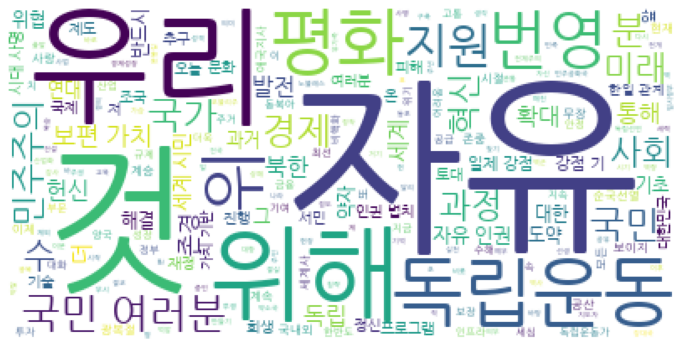

In [37]:
wc = WordCloud('./NanumGothic.ttf',
               background_color = "white",
               max_words = 200)
               #stopwords = stopwords)
wc = wc.generate(re1) # str자료만 가능, list자료는 안됨
plt.figure(figsize = (12, 12))
plt.imshow(wc) #interpolation = "bilinear")
plt.axis("off")
plt.show()

# 2. 단어빈도수 차트화

In [38]:
Counter(o_nouns)

Counter({'존경': 5,
         '사랑': 2,
         '국민': 15,
         '여러분': 11,
         '재외': 1,
         '동포': 1,
         '오늘': 3,
         '제': 1,
         '주년': 1,
         '광복절': 2,
         '조국': 3,
         '독립': 5,
         '위해': 12,
         '희생': 3,
         '헌신': 5,
         '순국선열': 2,
         '애국지사': 2,
         '유가족': 1,
         '감사': 1,
         '경의': 1,
         '표': 1,
         '일제': 4,
         '강점': 4,
         '기': 4,
         '시절': 2,
         '독립운동': 10,
         '독립선언': 1,
         '상해': 1,
         '임시정부': 1,
         '헌장': 1,
         '헌': 1,
         '윤봉길': 1,
         '선생': 1,
         '정신': 3,
         '바': 1,
         '주인': 1,
         '민주공화국': 1,
         '자유': 33,
         '인권': 5,
         '법치': 3,
         '존중': 2,
         '나라': 1,
         '위': 8,
         '것': 19,
         '무시': 1,
         '전체주의': 1,
         '국가': 7,
         '결코': 1,
         '비롯': 1,
         '모든': 2,
         '온': 3,
         '바로': 1,
         '광복': 1,
         '결실': 1,
         '거

In [39]:
w_cnt = Counter(o_nouns)

In [45]:
df = pd.DataFrame(w_cnt.most_common(), columns=['word', 'freq'])

In [48]:
df_50 = df.head(50)

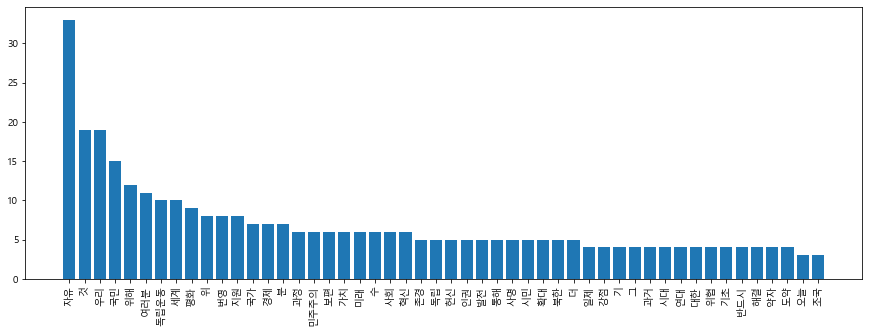

In [50]:
plt.figure(figsize=(15,5))
plt.bar(df_50['word'], df_50['freq'])
plt.xticks(rotation=90)
plt.show()

# 2_1. 상위 50개 보고 필요없는 단어 삭제 후 워드 클라우드

In [60]:
ls = ['것', '위', '분', '수', '통해', '더', '기', '그']
o_nouns2 = [i for i in o_nouns if i not in ls]

In [61]:
re2 = ' '.join(o_nouns2)

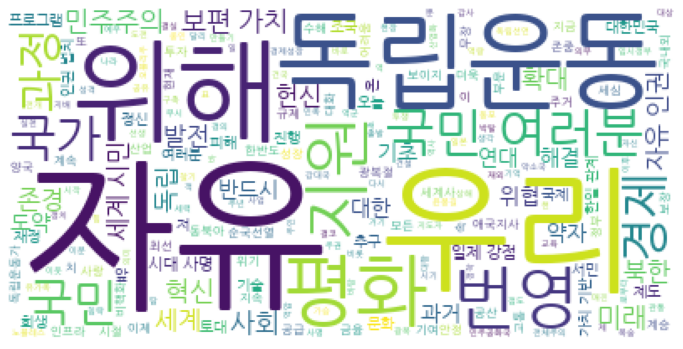

In [62]:
wc = WordCloud('./NanumGothic.ttf',
               background_color = "white",
               max_words = 200)
               #stopwords = stopwords)
wc = wc.generate(re2) # str자료만 가능, list자료는 안됨
plt.figure(figsize = (12, 12))
plt.imshow(wc) #interpolation = "bilinear")
plt.axis("off")
plt.show()

# 3. '자유'가 등장하는 글의 위치

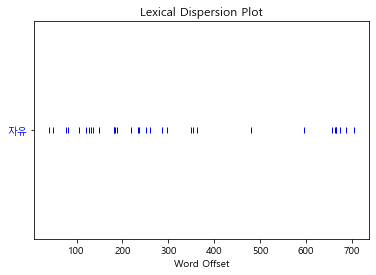

In [52]:
ko = nltk.Text(o_nouns)
ko.dispersion_plot(['자유'])

# 4. '자유' 주변 단어

In [53]:
ko.concordance('자유')

Displaying 25 of 33 matches:
 임시정부 헌장 헌 윤봉길 선생 독립 정신 바 국민 주인 민주공화국 자유 인권 법치 존중 나라 위 것 자유 인권 무시 전체주의 국가 위 독립
립 정신 바 국민 주인 민주공화국 자유 인권 법치 존중 나라 위 것 자유 인권 무시 전체주의 국가 위 독립운동 결코 일제 강점 기 시절 순국
독립운동 바로 오늘 광복 결실 독립운동 거기 것 그 이후 공산 세력 자유 국가 건국 과정 자유 민주주의 토대 경제성장 산업화 과정 바탕 민주
복 결실 독립운동 거기 것 그 이후 공산 세력 자유 국가 건국 과정 자유 민주주의 토대 경제성장 산업화 과정 바탕 민주주의 발전 온 과정 통
 통해 계속 현재 진행 중인 것 과거 약소국 강대국 억압 박탈 국민 자유 위해 주권 국가 것 시대 사명 앞 시대 사명 보편 가치 공유 국가 
 주권 국가 것 시대 사명 앞 시대 사명 보편 가치 공유 국가 연대 자유 인권 대한 위협 대항 세계 시민 자유 평화 번영 것 자유 찾기 위해
명 보편 가치 공유 국가 연대 자유 인권 대한 위협 대항 세계 시민 자유 평화 번영 것 자유 찾기 위해 시작 독립운동 자유 기초 경제 토대 
국가 연대 자유 인권 대한 위협 대항 세계 시민 자유 평화 번영 것 자유 찾기 위해 시작 독립운동 자유 기초 경제 토대 제도 민주주의 구축 
 대항 세계 시민 자유 평화 번영 것 자유 찾기 위해 시작 독립운동 자유 기초 경제 토대 제도 민주주의 구축 이제 보편 가치 기반 세계 시민
기초 경제 토대 제도 민주주의 구축 이제 보편 가치 기반 세계 시민 자유 확대 것 계승 발전 존경 국민 여러분 광복절 오늘 우리 과거 미래 
 시기 우리 독립운동 그 성격 시대 사명 달리 진행 온 역 적 과정 자유 자유 자유 확대 또 세계 시민 연대 자유 대한 위협 세계 평화 번영
 우리 독립운동 그 성격 시대 사명 달리 진행 온 역 적 과정 자유 자유 자유 확대 또 세계 시민 연대 자유 대한 위협 세계 평화 번영 것 
 독립운동 그 성격 시대 사명 달리 진행 

# 5. 연어 단어 확인

In [55]:
ko.collocations()

순국선열 애국지사; 한반도 동북아


# 위키피디아 대한민국 연어 확인 (과제 외 추가 분석)

In [58]:
txt_wiki = '''
대한민국(大韓民國, 영어: Republic of Korea, ROK), 약칭 남한(南韓, 영어: South Korea), 한국(韓國)은 동아시아의 한반도 남부에 자리한 민주공화국이다. 대한민국의 국기는 대한민국 국기법에 따라 태극기[3], 국가는 관습상 애국가[4], 국화는 관습상 무궁화이다. 공용어는 한국어와 한국 수어이다. 수도는 서울이다. 인구는 약 5,160만명으로, 전체 인구 중 절반 정도(약 2611만명)가 수도권에 살고 있다.[5]

대한민국은 1948년 5월 10일 총선거를 통해 제헌국회를 구성하였고, 1948년 8월 15일 대한민국 정부를 수립하였다. 1948년 제헌 국회에서 대한민국의 국호를 계승하여 헌법에 명시하였고, 다시 1950년 1월 16일 국무원 고시 제7호 ‘국호 및 일부 지방명과 지도색 사용에 관한 건’에 의해 확정하였다.

대한민국은 20세기 후반 이후 급격한 경제 성장을 이루었다. 그 과정에서 1990년대 말 외환 위기 등의 부침이 있기도 했다. 대한민국의 2022년 1인당 국민 총소득 (GNI)은 명목 3만 4,994달러이다.[6] 2020년 유엔개발계획 (UNDP)이 매년 발표하는 인간개발지수 (HDI) 조사에서 세계 22위를 기록하였다.[2] 2021년 7월 2일 스위스 제네바 본부에서 열린 ‘제68차 무역개발이사회’ 마지막 회의에서 한국의 지위를 선진국 그룹으로 ‘의견 일치’로 변경하고 선진국으로 인정했다.[7] 다만 높은 자살률, 장시간 근로 문화와 높은 산업 재해 사망률, 저출산 등의 사회 문제가 이 같은 성과와 병존하고 있다. 대한민국의 행정 구역

대한민국은 이코노미스트에서 발표하는 민주주의 지수 조사에서 2019년 기준 23위의 8.0점을 기록한 바와 같이 아시아에서 민주주의 수준이 가장 높은 국가 가운데 하나이다. 또한 대한민국은 주요 20개국 (G20), 경제 협력 개발 기구 (OECD), 개발 원조 위원회 (DAC), 파리 클럽 등의 회원국이다.[8]

1948년 이후로 오늘날까지 한반도에는 대한민국과 조선민주주의인민공화국이라는 두 개의 분단국가가 각각 남북에 위치하고 있다. 한반도와 부속도서의 면적은 약 22만 km2이며, 인구는 대한민국과 조선민주주의인민공화국을 합쳐 2019년을 기준으로 약 7,700만 명에 달한다[9].

국명
<nowiki /> 이 부분의 본문은 한국의 나라 이름입니다.
<nowiki /> 고려 § 사회 및 갑오개혁 § 제1차 갑오개혁 문서를 참고하십시오.
한국의 역사
Gyeongbokgung Palace.png
선사 시대
고조선 시대
원삼국 시대
삼국 시대
남북국 시대
후삼국 시대
통일 왕조 시대
식민지 시대
현대
주제별 역사
vte
대한민국(大韓民國)이란 국호 중 ‘한’ 또는 ‘대한(大韓)’은 우리 민족이 한민족을 중심으로 이루어졌기 때문에 생긴 말로서 이는 고조선과 ‘한(韓)’이 우리 민족의 혈통이며, ‘한(韓)’은 환웅을 모시고 백성들을 다스린 입법부, 사법부, 행정부의 세분의 책임자로서 위대한 지도자, 이상적인 인간상을 말한다.

나중에는 한(汗)이 군주를 뜻하는 말로 사용되었다. 이후 여기에 민국(民國)[10]을 더한 대한민국(大韓民國)이라는 국호는 이승만, 김구 등 대한민국 임시정부의 강력한 의지에 따라 결정되었다.

1948년 제헌 국회에서 이 국호를 계승하여 헌법에 명시하였고 다시 1950년 1월 16일 국무원 고시 제7호 "국호 및 일부 지방명과 지도색 사용에 관한 건"에 의해 확정하였다.[11] 이에 20세기 전반까지도 널리 사용되던 지명으로서의 "조선"이라는 이름은 "대한(大韓)"이나 "한국(韓國)", "한(韓)"으로 대체하여 현재 대한민국 내에서는 거의 쓰이지 않는다. 이에 따라 대한민국의 국민은 자국의 국호를 "대한민국", "한국" 등으로 부르며, 자국을 호칭할 때는 흔히 "우리나라"라고 한다. "대한"이라는 칭호를 사용하기도 하며, 한반도 북부에 자리한 조선민주주의인민공화국과[12] 대비해 한반도 남부에 있다 하여 "남한"으로도 불리는데, 특히 대한민국 한반도 북부를 점거하고 있는 조선민주주의인민공화국은 한국을 남조선(南朝鮮)이라고 부른다.[13]

대한민국 내에서는 대한민국을 간단히 한국(韓國) 또는 남한(南韓) 등으로도 부른다.[9] 조선민주주의인민공화국은 대한민국을 반국가단체로 보기 때문에 대한민국이라는 정식 명칭 대신에 남조선(南朝鮮)으로 부른다[14][15]. 대한민국은 과거엔 구한국(舊韓國), 신한국(新韓國)이라고 부르기도 하였다. 국제사회에서는 관습상 대한민국을 간단히 코리아(Korea)라 부르며, 이 이름은 동아시아의 고대 국가인 고려에서 유래하였다.

코리아(Korea)란 영문 국호의 어원은 동아시아의 중세 국가인 고려에서 유래하였다.[16][17][18][19] 고구려가 5세기 장수왕 때 국호를 고려(高麗)로 변경한 것[20][21]을 918년 건국된 중세 왕조 고려(高麗)가 계승하여 '고려'라는 국명이 아라비아 상인등을 통해 전 세계에 알려졌다. 유럽인들이 '고려'를 코레(Core, Kore), 코리(Kori)로 불렀고, 이 명칭에 '~의 땅'을 의미하는 '-a'를 붙어 '고려인의 땅'이라는 '코레-아'(Corea), '코리-아'(Korea), '코리-아'(Koria)가 되어 프랑스어로 Corée, 스페인어로 Corea, 영어로 Korea라고 불리게 되었다[22][23]. 현재 대한민국의 공식 영어 명칭은 Republic of Korea로서, 약칭 'R.O.K.'이며 관습상으로는 간단히 Korea라고 불리며 국제 표준화 기구에서는 약칭 'KOR'로 불린다.

공식 문서에는 'Corea' 또는 'Korea'가 혼용되어 사용되었고, 1900년대 초기부터 영어권에서는 'Korea'의 사용 빈도가 높았다. 1892년 외국인이 자주 보는 잡지 〈The Korean Repository Archived 2016년 2월 18일 - 웨이백 머신〉 5월 호에는 “미국 국무부와 영국의 왕립지리학회는 우리가 차용한 이 땅의 이름을 아주 조리 있게 Korea로 표기하기 시작했던 것”이라는 내용이 나온다.[24]

중화인민공화국, 중화민국, 일본, 베트남 등 주로 동아시아에 있는 한자 문화권 국가들에서도 일상에서 대한민국을 간단히 한국(중국어 간체자: 韩国, 정체자: 韓國, 병음: hánguó 한궈[*], 일본어: 韓国 간코쿠, 베트남어: Hàn Quốc한 꾸옥)이라 부른다. 다만 여전히 한반도 전체를 부를 때는 조선(중국어 간체자: 朝鲜, 정체자: 朝鮮, 병음: cháoxiǎn 차오시엔[*], 일본어: 朝鮮 조센, 베트남어: Triều Tiên찌에우 띠엔)이라는 명칭을 사용한다.

지리
지형
<nowiki /> 이 부분의 본문은 대한민국의 지리입니다.
<nowiki /> 한국의 지질 문서를 참고하십시오.

대한민국의 지도
서쪽으로 중화인민공화국과 황해를 사이에 두고, 동쪽으로 일본과 동해를 사이에 두고, 북쪽으로 북한과 한반도 군사 분계선을 사이에 두고 맞닿아 있다.[25]

한반도는 제3기 마이오세 이후에 일어난 단층과 요곡운동의 결과 동쪽으로는 높은 산지가 급경사로 동해안에 임박하고 서쪽으로는 서서히 고도가 낮아진다. 이를 동고서저의 경동지형이라 한다.[26] 높은 산들은 대부분 동부 지방에 치우쳐서 한반도의 등줄기라 불리는 태백산맥에 자리한다. 태백산맥의 대표적인 산이 설악산이다. 태백산맥의 남서쪽으로 소백산맥이 이어지며 그중에는 지리산이 유명하다. 제주도에는 대한민국에서 가장 높은 산이자 사화산인 한라산이 있다.


대한민국의 지형도
하천의 유량은 극히 불규칙하여 여름에는 집중 호우로 연 강수량의 약 60% 이상이 홍수로 유출되며, 갈수기에는 강바닥을 거의 드러내는 하천이 많다. 대표적인 강은 위쪽부터 반시계 방향으로 한강, 금강, 영산강, 섬진강, 낙동강 등이다. 대다수의 강이 산지가 많은 동쪽에서 평평하고 낮은 구릉이 대부분인 서쪽으로 흐르며 중하류에 비교적 넓은 충적평야가 전개된다.

산맥은 교통에 적지 않은 제약을 주어, 산맥을 경계로 지역의 문화나 풍습이 크게 차이가 나기도 한다. 산맥으로 가로막힌 지방은 고개를 넘어 왕래했는데 영서 지방과 영동 지방을 연결하는 태백산맥의 대관령·한계령·진부령·미시령, 중서부와 영남 지방을 연결하는 소백산맥의 죽령·이화령·추풍령·육십령 등이 산맥을 넘는 주요한 교통로로 사용된다.

한반도의 서쪽은 황해, 동쪽은 동해, 남쪽은 남해와 맞닿아 있어 삼면이 바다로 둘러싸인 반도형이며, 가장 큰 부속 도서인 제주도 남쪽으로는 동중국해와 접한다. 황해와 남해 연안은 해안선이 복잡한 리아스식 해안으로 조수 간만의 차가 클 뿐만 아니라 해안 지형도 꽤 평탄하여 넓은 간석지가 전개된다. 또한 수많은 섬이 있어서 다도해라고도 불린다. 반면에 동해 연안은 대부분 해안선이 단조롭고 수심이 깊으며 간만의 차가 적다. 해안 근처에는 사구·석호 등이 형성되어 있고 먼 해상에 화산섬인 울릉도가 있으며 그보다 동쪽으로 약 87.4km 거리에 대한민국 최동단인 독도가 위치한다. 서쪽에는 평지가 발달됐다.

기후
<nowiki /> 대한민국의 기후 문서를 참고하십시오.

인공위성으로 촬영한 대한민국.
북위 33도~38도, 동경 126~132도에 걸쳐 있어 냉대 동계 소우 기후와 온대 하우 기후, 온난 습윤 기후가 나타난다. 겨울에 북부 지역은 편서풍으로 인해 시베리아와 몽골 고원의 영향을 받아 대륙성 기후를 띠어서 건조하고 무척 추우나 남부 지역은 이런 영향을 적게 받아 상대적으로 온난한 편이다. 여름에는 태평양의 영향을 받아 해양성 기후의 특색을 보여서 고온다습하다. 계절은 사계절이 뚜렷이 나타나며 대체로 북부 지역은 여름과 겨울이 길고 남부 지역은 봄과 가을이 길다.

3월 초에서 5월 초에 걸쳐 포근한 봄 날씨, 5월경에서 8월 초에는 무더운 여름이, 8월 말에서 10월 말까지는 화창하고 건조한 가을 날씨가 이어지고, 11월에 기온과 습도가 점차 낮아지기 시작하여 12월에서 2월까지는 춥고 건조한 겨울 날씨를 보인다. 중부 산간 지방을 제외하고 대체로 연 평균 기온은 10 ~ 16℃이며, 가장 무더운 달인 8월은 23 ~ 36℃, 5월은 16 ~ 19℃, 10월은 11 ~ 19℃, 가장 추운 달인 1월은 -6 ~ 3℃이다.[27]

비는 주로 여름에 많이 내리는데 연 강수량의 50 ~ 60%가 이때 집중된다. 이를 장마라고 하며 특히 6월 말에서 7월 중순까지를 장마철이라 한다. 각 지역의 연 평균 강수량은 중부 지방이 1100 ~ 1400mm, 남부 지방이 1000 ~ 1800mm, 경북 지역이 1000 ~ 1200mm이다. 경상남도 해안 지역은 약 1800mm이며 제주도는 1450 ~ 1850mm이다.[27]

습도는 7월과 8월이 높아서 전국에 걸쳐 80% 정도이고 9월과 10월은 70% 내외이다. 태풍은 북태평양 서부에서 연평균 28개 정도가 발생하여, 이 중 두세 개가 영향을 미친다.[27]

본래 4계절이 뚜렷한 기후 환경이었으나 지구 온난화 등의 영향으로 봄, 가을의 기간이 급격히 줄어들며 게릴라성 폭우로 특징되는 열대성 호우가 잦아 아열대화가 진행되면서 어업이나 농업에 변화가 있다.[28]

동식물
<nowiki /> 대한민국의 식생 문서를 참고하십시오.

시베리아호랑이는 한국호랑이와 비슷한 종류이다.
한반도 전역에 동식물 10만 여 종이 분포한다. 호랑이 중에서 가장 큰 종인 백두산호랑이가 과거 살았었으나 현재는 보이지 않는다. 그 밖의 맹수로는 반달곰과 표범이 있으며 소수 개체군이 생존한다. 그 밖에도 멧돼지, 고라니, 너구리 등의 포유류와 까치, 꿩, 참새, 비둘기를 비롯한 텃새, 두루미, 기러기 같은 철새가 서식하며 지네나 거미, 수많은 곤충류도 서식한다. 삼면이 바다여서 난류와 한류에 서식하는 다양한 어패류와 고래도 존재한다. 또 최근에는 지구 온난화로 한류성 어류가 감소하고 불가사리나 해파리가 급증해서 큰 문제가 되고 있다.

산삼이나 진달래, 소나무 등 많은 식물은 약용이나 기타 여러 용도로 쓰인다. 제주도에는 열대림과 비슷한 야자수가 번육하며 지리산이나 태백산맥에는 북방계형의 특산 식물들이 자생한다. 백두산에는 시베리아나 만주에서만 볼 수 있는 침엽수림과 같은 북방계 식물류가 자란다. 중부 지방에는 높은 산지로 말미암아 고산형 식물과 약용 식물 여러 종이 자생한다.

천연자원
<nowiki /> 대한민국의 자원 문서를 참고하십시오.
시멘트 공업과 석회공업(石灰工業)의 원료인 석회암은 한국의 주요 자원으로 각지에 대량 분포한다. 다른 자원은 양이 적거나 품질이 낮아 채산성이 맞지 않으므로 거의 생산하지 않는다. 다만 21세기에 와서 국제 원자재 가격의 상승과 기술의 발전으로 재개장하는 광산이 있다. 석탄은 무연탄만이 있으며 삼척, 태백 일대에 주로 분포한다. 철광석은 양양, 충주 등지에서 주로 캤다. 텅스텐은 매장량이 매우 많으며 특히 영월에 대규모의 광산이 있다.

울산 앞바다에 천연가스층을 발견하고 개발중이며, 독도 부근 해저에서 메테인 하이드레이트 대규모 매장량을 발견했다. 석유는 제주도 남방 해역 대륙붕 제7광구에 천연가스와 함께 매장 가능성을 언급하나[29] 실제로 탐사하지 않았다. 이곳은 1974년에 체결한 한일 대륙붕 협정에 따라 2028년까지 한일이 공동 관리한다.

역사
<nowiki /> 이 부분의 본문은 대한민국의 역사입니다.
<nowiki /> 1948년 이전 한반도를 중심으로 한 한민족의 역사에 관해서는 한국의 역사 문서를 참고하십시오.
기원
<nowiki /> 이 부분의 본문은 한민족입니다.

한민족의 영산(靈山)으로 일컬어지는 백두산 천지.
한반도에 두 발로 걷고 도구를 이용하는 사람들이 살기 시작한 시기는 기원전 약 70만 년 이전으로 추정되며, 현생인류는 후기 구석기 시대인 약 2만 5천 년 전부터 해안과 강가를 중심으로 거주하기 시작한 것으로 보인다. 인골 화석으로는 충청북도 단양군 상시굴과 두루봉동굴, 제천시 점말굴 등에서 현생인류로 추정되는 사람 뼈 화석이 발견된 바 있다[30]. 이후 중석기 시대와 신석기 시대를 거치면서 여러 빗살무늬 토기인, 무문토기인등 여러 인종의 유입과 주변 세력들과의 상호작용을 통해 문명이 발전했다. 다만 초기 구성원들의 이동과 외부 세력 유입의 구체적 모습은 확실하지 않다.

한반도 일대의 최초의 국가는 고조선이다. 일연의 《삼국유사》에서는 현존하지 않는 《고기》를 인용하여 단군 왕검이 고조선을 세웠다고 기록하였고 《동국통감》에서 그 시기를 기원전 2333년이라 하였다. 날짜는 대종교에서 임의로 음력 10월 3일로 약속하고 개천절이라 불렀는데 대한민국 정부에서 그 날을 양력으로 고쳐 국경일로 지정하였다[31]. 고조선 멸망을 전후하여 부여, 옥저, 동예, 진국, 삼한 등 여러 나라가 생겨났고, 이후 고구려, 백제, 신라의 삼국 시대로 이어졌으며 이 중 신라가 삼국을 부분적으로 통일하는 한편 북쪽의 발해와 함께 남북국 시대를 형성했다[32]. 10세기 고려가 등장하면서 한민족 단일 국가의 시대를 시작했다[33]. 14세기 조선이 이를 계승했다.

한국의 역사

두만강
한반도의 국가로는 전설적으로 단군이 건국한 단군조선이 있다. 4세기에는 고구려, 신라, 백제, 가야가 한반도 내에서 대립하였다. 6세기에는 가야제국이 신라 등에 병합되어 고구려, 신라, 백제 삼국이 패권을 다툰 후 당나라와 동맹한 신라는 663년 백촌강 전투에서 백제를 멸망시켰다[34]. 668년 고구려왕을 투항시켜 고구려를 멸망시켰다. 그러나 당나라의 최종 목표는 신라를 이용해 한반도를 장악하려는 것이었다. 이러한 당나라의 야심에 신라의 문무대왕은 고구려와 백제의 유민과 연합하여 당나라와 정면으로 대결하였다. 676년 나당 전쟁이 발발 하였고 금강 하구의 기벌포에서 당나라의 수군을 섬멸하여 당나라의 세력을 한반도에서 완전히 몰아내었다. 그후 당나라의 지배력이 쇠퇴함과 동시에 677년 통일신라를 세웠다. 그후 북쪽의 발해와 함께 남북국 시대를 형성했다[32]. 이후 통일신라의 약체로 892년 후삼국시대가 시작된 후, 918년 건국된 고려가 936년 전국을 통일하였다[33].

13세기 초 중국 대륙의 정세는 급박하게 변화하고 있었다. 오랫동안 부족 단위로 유목 생활을 하던 몽골족이 통일된 국가를 형성하면서 몽골 제국을 세웠다. 그 후, 1231년 고려에 왔던 몽골 사신 일행 저고여가 귀국하던 길에 국경 지대에서 거란족에게 피살되자 이를 구실로 몽골군이 침입해 왔는데, 이른바 고려-몽고 전쟁의 시작이었다[35]. 그러나 당시 집권자인 최우는 강화도로 도읍을 옮기고, 장기 항전을 위한 방비를 강화하였다. 이후 고려는 7차에 걸친 몽골 침략을 끈질기게 막아 내며, 약 30년간의 장기 항전에 들어갔다. 장기간의 전쟁으로 국토는 황폐해지고 백성들은 도탄에 빠지게 되었다. 고려는 몽골 제국의 침공으로 약화되었고, 1392년 고려의 장수 이성계가 고려 공양왕을 폐위하고 국왕으로 즉위하면서 조선이 성립되었다.

조선(朝鮮)은 계속되는 세도정치로 왕족들은 힘을 쓰지 못했고, 왕권도 매우 약해져 있었다. 조선은 흥선대원군의 쇄국정책으로 외교를 하지도 보지도 않았고, 눈과 귀를 닫는다. 대원군은 1866년(고종 3)에 천주교에 대한 탄압과 당시 우리나라에 잠입한 프랑스 선교사를 처형한 사건으로 프랑스와 전쟁을 하였다. 잇따라 1871년에는 제너럴셔먼호(General Sherman號) 사건을 계기로 미국과 전쟁을 벌였다. 대원군은 “서양 오랑캐의 침입에 맞서서 싸우지 않는 것은 화평하자는 것이며, 싸우지 않고 화평을 주장하는 자는 매국노이다(洋夷侵犯非戰則和, 主和賣國).”라는 글을 새긴 척화비를 전국 각지에 세우고, 단호한 쇄국정책을 천명하였다. 19세기 근대화의 물결이 동아시아로 밀려오는 가운데 조선은 점차 약화해 갔으며, 19세기 중반부터 서구 열강들이 동아시아로 모여들었다.

대한민국 임시정부
<nowiki /> 일제강점기 및 대한민국 임시정부 문서를 참고하십시오.

대한민국 임시정부 국무원 기념 사진(1919년 10월 11일).
1919년 3월 1일, 한국인들은 민족대표 33인의 독립선언서 낭독을 시작으로 독립을 위한 3·1운동을 펼쳤다. 이 운동은 대체로 각 지역에서 정기적으로 열리던 장(시장)의 개장일에 맞추어 전국으로 퍼져 나갔다. 이는 국내외 독립운동의 새로운 전환점을 마련하게 된다.

4월 11일, 3·1운동의 정신을 이어받아 중화민국 상하이에서 대한민국 임시정부가 수립되었다. 임시정부는 대한민국 임시 헌법을 제정하여 대통령제와 3권 분립을 채택하고 한국의 독립을 위하여 외교·군사적으로 노력했다. 그러나 독립운동 노선의 갈등으로 여러 인사들이 빠져나가면서 국무령 중심의 집단지도체제로 전환하였다.

이후 김구를 주축으로 주석중심제로 재정비하고 조소앙의 삼균주의를 건국강령으로 채택하였다. 1942년에는 좌파 계열인 조선민족혁명당의 김규식, 김원봉 세력과 김성숙, 유림 등의 무정부주의자들이 임시정부에 합류하여 민족통일전선 형성의 기틀이 마련되었다. 미국 OSS와도 연계하여 1945년 9월을 기한으로 국내 진공 작전을 준비하였다. 현행 대한민국 헌법 전문에는 대한국민이 3·1운동에 따라 건립된 대한민국 임시정부의 법통을 계승한다는 문구가 삽입되었다.

한국의 군정기
<nowiki /> 이 부분의 본문은 대한민국 정부 수립 및 한국의 군정기입니다.

1948년 대한민국 정부 수립 선포식

1945년 8월 15일부터 1948년 7월까지 38선 이남에서 사용한 태극기
1945년 8월 15일, 한반도는 얄타회담에서 이루어진 비공식적 합의에 따라 소련과 미국의 신탁 통치하에 들어갔다. 1945년 9월에는 한반도의 북위 38도선을 경계로 남쪽은 미군이, 북쪽은 구 소련군이 포고령을 선포하여 각각 군정을 실시하면서 한반도는 남과 북으로 분단되었다. 이후 여운형, 안재홍 등은 1944년 설립한 지하조직인 건국동맹을 모태로 조선건국준비위원회를 개최하였고, 9월 여운형, 박헌영 등에 의해 조선인민공화국 내각이 수립되었다. 그러나 1945년 11월 중화민국 쓰촨성 충칭에서 개인 자격으로 귀국한 대한민국임시정부 요인들과 '임정정통론' 문제로 갈등이 벌어졌고, 미군정은 맥아더 포고령에 따라 인공 내각(조선인민공화국 내각)과 임시정부를 승인하지 않음으로써 인공 내각은 해산되었다.

1945년 12월에 모스크바 3상 회의에서 신탁통치안 문제를 놓고 한반도 내에는 좌, 우익 세력간 대립이 격화되었다. 곧이어 1946년 5월에는 미소공위가 개최되었으나 양측의 주장이 엇갈려 결렬되었다. 이때 김규식, 여운형, 안재홍 등은 통일 임시정부 수립을 위해 좌우합작운동을 개시하여 미소공위를 재개하고자 하였지만, 한민당과 남로당 등 좌우익세력간에 불참으로 중도파 세력만의 운동으로 축소되었다. 1945년 12월 송진우 암살, 1947년 7월에 여운형 암살 등 해방정국의 잇단 사건으로 좌우합작운동은 실패로 끝났다.

대한민국 정부 수립
미군정청이 1946년 7월 서울지역 1만여 명에게 실시한 '어떤 정부 형태를 원하는가'에 대한 여론조사에서 70%가 "사회주의를 지지한다"라고 밝힌[36] 상황에서 화순탄광 노동자들의 생존권 보장을 요구하며 벌인 봉기에 대한 유혈 진압[37]과 사회주의적인 인민 공화국을 인정하지 않고 자신의 뜻을 관철하고자 했던 미 군정은 온건파인 김규식, 안재홍, 여운형을 통해 좌우 합작과 협상을 주도하게 했다. 그러나 헤게모니 장악에서 제외된 것에 불만을 품은 이승만, 김구, 윤치영, 박헌영, 허헌 등의 반발에 봉착하게 되었다. 이후 제2차 미소공위 마저 결렬되어버리자 미국은 한반도 문제를 UN 총회로 이관했고, 총회에서 남한 내 단독정부 수립이 결정되었다. 이에 김규식, 조소앙, 김구 등은 통일 정부를 수립하기 위해 남북협상 등을 추진하여 노력하였으나 수포로 돌아가고, 남한에서도 선거 가능한 지역에 한한 정부 수립론이 제기되면서 (정읍 발언) 사실상 남북 단일 정부 수립은 불가능한 모양새가 되었다.

1948년 1월부터 한반도의 정국은 단독 정부 수립론과 남북 협상을 통한 정부 수립론을 놓고 의견이 갈라서게 되었다. 그러나 1948년 2월 38선 이북에서는 북조선인민위원회를 구성하고, 조선인민군을 창건하면서 분단은 사실상 불가피하게 되었다. 5월 10일 38도선 이남에서만 제헌 의원 총선거가 실시되어 제헌 국회가 탄생하였고, 같은 해 7월 17일에는 초대 헌법인 대한민국 제헌 헌법이 구성되었다. 7월 22일에는 국회의 간접 선거로 이승만이 초대 대통령, 이시영이 초대 부통령으로 선출되었고, 8월 15일에는 대한민국 정부 수립이 선포되었다.

	위키문헌에 이 글과
관련된 원문이 있습니다.
United Nations General Assembly Resolution 293
12월 12일 "유엔 총회 결의 195(III) 한국의 독립 문제"에서 대한민국이 "한반도에서 유일하게 그러한 정부(the only such Government in Korea)"임을 선언하였다. 여기서 '그러한'은 대한민국이 임시위원단의 감시 하에서 주민들 대다수의 자유 의사에 따라 수립되었고, (분단상태를 고려할 때)선거가 가능했던 그 지역에 대한 유효한 지배권과 관할권을 가진 합법정부임을 뜻한다. 이미 48년 9월 9일에 한반도 이북에서는 조선민주주의인민공화국이 선포되었음에 미루어 그 해 12월의 결의는 대한민국만을 한반도에서 유일한 합법정부로 인정한 것이다. 이명박 정부에서 만든 새 교육과정에서 교과서 집필진이 학회에 자문한 결과 "1948년 12월 유엔 결의에서 대한민국은 ‘유엔한국임시위원단의 감시가 가능한 지역에서 수립된 유일한 합법 정부’로 인정됐으며, 남북한이 1991년 유엔에 동시 가입했기 때문에 ‘한반도 유일의 합법 정부’라 명시하는 것은 시비의 소지가 있다"고 하면서 '유일한 합법정부는 1948년 정부에 한정'되어 시비의 대상이 될 수 있는 '유일한 합법 정부'를 제외했으나 정부 측의 요구로 포함시켰는데 2019년 5월 2일 공개된 중·고교 역사교과서의 집필기준 시안에서 대한민국이 ‘한반도의 유일한 합법정부’라는 표현이 빠졌다.[38]

6.25 전쟁

6·25 전쟁 중 동생을 등에 업고 지나가는 소녀
<nowiki /> 이 부분의 본문은 6.25 전쟁입니다.
조선민주주의인민공화국의 김일성은 남침을 기도하여 공산주의화 하려는 야망을 실현하고자 준비하였다. 소련의 지도자인 이오시프 스탈린의 승인을 받자, 1950년 6월 25일 새벽 4시에 소련에서 지원받은 수십대의 소련제 탱크를 앞세워 대한민국을 침공했다. 당시 대한민국에는 탱크의 공세를 막을 수 있는 방어책이 전혀 없었고 야포와 전투기 등 모든 것이 압도적으로 열세였기 때문에 총만 가진 거의 맨 몸의 한국군은 순식간에 밀려날 수 밖에 없었다. 그렇게 대한민국은 조선인민군이 침략한 3일만에 수도인 서울을 인민군에게 빼앗기게 된다. 치밀하게 계획하고 무장한 인민군을 상대하는 것이 계란으로 바위치기였던 한국군은 결국 밀려나 낙동강 방어선을 최후의 배수진으로 정하고 버티었다. 이 과정에서 수많은 어린 학생들(학도병들)이 무고하게 죽어나갔으며 많은 사상자와 인명피해가 초래되었다.

하지만 유엔군이 파병으로 지원하고 유엔군 총사령관 더글러스 맥아더가 9.15일 인천 상륙 작전을 벌여 조선인민군에 반격을 시작하자 얼마 지나지 않아 대한민국은 9월 27일에 서울을 탈환해냈다. 10월 1일에는 38도선까지 수복해서 원점으로 돌아갔다. 이 때 유엔 내부에서 맺어진 새로운 결의로 유엔군의 목적이 조선민주주의인민공화국을 완전히 공략하려는 목적으로 변경되었다. 이후 한국과 유엔군은 거듭해서 10월 26일에는 압록강까지 올라갔으나 곧 이어 중화인민공화국이 인해전술을 펼치며 참전하고 소련이 군사를 지원하여 전세가 다시 역전되었고 전쟁은 장기화되었다. 이후 38도선 인근 중부 지방에서 교착을 거듭하던 1953년 7월 27일에 휴전협정이 오전 10시에 체결된 후에 효력이 발생한 22시에 완전히 전투가 종료되고 군사 분계선이 형성되면서 오늘날까지 휴전 상태가 이어지고 있다.

6.25 전쟁으로 20만 명이 과부가 되었고 10만여 명 이상이 고아가 되었으며 1천만여 명 이상이 이산 가족 신세가 되었다. 한반도 내 45%에 이르는 공업 시설이 파괴된 탓에 경제적, 사회적 암흑기가 도래하여 한국과 북한의 경제 수준이 떨어졌다. 무엇보다도 이 전쟁으로 인해 남북 간에 서로에 대한 적대적 감정이 극도로 팽배하게 되어 한국의 분단이 더욱 고착화되면서, 분단한 지 70여년에 이르고 있다.

제1·2공화국

1960년 4.19 혁명.
<nowiki /> 이 부분의 본문은 대한민국 제1공화국, 4·19 혁명 및 대한민국 제2공화국입니다.
한국 전쟁이 휴전 협정을 맺은 후 1950년대는 미국으로부터 지원을 받아 전후복구사업을 실시하는 가운데 경제원조체제가 성립되던 시기였다. 제1공화국 정권의 고위 관료는 부패해 국민의 불만을 샀다. 의원 내각제였던 제1대 내각에서 재선이 불가능하다 판단한 이승만은 이범석과 장택상을 비롯한 측근들과 족청계, 백골단, 땃벌떼 등을 동원하여 부산정치파동(1952년), 사사오입 개헌(1954년)을 일으키고 장기집권을 추진했다. 그러나 이범석, 장택상 등의 성장을 두려워한 이승만은 이들을 제거하고 이기붕 계열을 등용한다. 이기붕 계열은 또한 친 자유당 성향의 이정재, 임화수, 유지광 등의 정치깡패들을 활용하여 야당 의원의 집회를 탄압, 제1공화국 후반기는 혼란을 거듭했다.

그 와중에 부통령 장면의 피격 사건(1958)과 조봉암 사법살인(1959) 등의 조치까지 겸해졌고 언론의 자유마저 통제당했다. 1959년 곳곳에서 정부의 독재에 저항하는 집회가 시작, 1960년 3월 15일 부통령 선거의 부정을 계기로 국민들의 불만은 극에 달해 4·19 혁명이 발생했고, 마산 앞바다에서 며칠 전 실종되었던 김주열의 주검이 떠오르면서 시위는 격화되었다. 4월 26일 이승만 대통령이 하야를 선언하여 제1공화국은 붕괴했다.


제2공화국 국무총리 장면
4·19 혁명 이후 허정 과도 내각을 거쳐 장면을 수상으로 하는 제2공화국이 수립됐다. 제2공화국은 3차 개헌을 통해 내각책임제와 양원제를 구성했고, 언론 자유와 혁신계 정치활동을 허용했다. 제2공화국 당시 각계 각층의 통일 운동과 민주화 요구가 분출되기도 했는데, 집권 여당인 민주당 사이에서 신파와 구파가 나뉘어버려서 개혁 의지가 미약한 탓에 이러한 요구들을 수용하지 못했다. 곳곳에서 데모가 연이어 벌어졌고, 장면이 단호한 조치를 계획하던 중 1961년 5월 16일 새벽 5·16 쿠데타로 내각 각료들이 체포되면서 장면 내각은 1년 남짓밖에 집권하지 못하고 무너졌다.

그 뒤 윤보선은 형식적인 민정을 실시하였으나 군사정변 세력에게 구정치인 정화법(1962)으로 정치활동을 정지당하자 여기에 불만을 품고 사퇴(1962.3.22)함으로써 1962년 3월부터 1963년 12월까지 5·16 군사정변 세력이 설립한 국가재건최고회의가 사법권·행정권·입법권을 모두 장악하고 군정을 실시했다.

제3·4공화국

1961년 5.16 군사정변 당시 박정희.
<nowiki /> 이 부분의 본문은 대한민국 제3공화국, 대한민국 제4공화국 및 최규하 정부입니다.
1963년 12월 5·16 군사 정변을 주도한 박정희 등에 의해 제3공화국이 수립됐다. 야당 후보인 윤보선과의 두 차례의 선거전에서 10만 표 안팎의 근소한 차로 집권하였다. 재임 초반 시위를 무력 진압하며 강행했다. 5.16부터 1979년까지 한국은 여러 차례 외환위기와 부도위기를 겪었고, 마이너스 성장만해도 1963년과 1964년의 2분기, 1961년, 1962년, 1965년, 1966년, 1979년의 각각 3분기, 1970년과 1978년 1분기, 1967년과 1968년의 4분기 등 1961~1979 박정희 집권 74분기 중 14분기(19%)에 이르렀으며, 1960년대 개발 독재의 일환으로 정부는 경공업 중심의 수출 주도형 발전과 베트남 전쟁, 한독근로자채용협정등을 통한 외화 획득으로 경제 발전을 꾀했다. 1970년대에는 중화학 공업과 전자산업을 집중적으로 육성했다. 하지만 도시와 농촌의 소득 격차, 저임금 노동과 빈부격차와 같은 문제도 남겼다.

이후 박정희 정부는 3선 개헌을 통과시키고 1971년 대선에서 3선에 성공한다. 그런데 대선에서 야당 후보가 돌풍을 일으키고 같은 해 총선에서 야당의 의석수가 2배로 늘어나는 선전을 이룬 데다가 제1차 석유 파동 등으로 경제성장도 한계를 보이기 시작하면서 정권 유지에 위기를 느낀 박정희 정부는 1972년 유신 헌법을 통과시키고, 제4공화국을 선포하였다.

1971년 대통령 선거에서 야당의 돌풍으로 불안감을 느낀 박정희는 1972년 7·4 남북공동성명을 발표하고, 통일을 준비한다는 명목으로 10월 유신을 선포해 유신체제를 수립했다. 이를 통해 대통령의 임기를 6년 연임제로 수정하는가 하면 국회의원을 대통령이 임명하게 할 수 있는 법안까지 통과시키는 등 대통령의 권한을 비정상적으로 확대시켰다. 이에 노동운동계, 재야와 학생 세력 등이 민주화를 요구하지만, 정부는 잇따른 긴급조치를 통해 억눌렀다. 하지만 민주화 운동 세력 및 노동운동가의 반발은 계속되었다. 미국이 한국의 '인권 침해'를 비판하기 시작하자 한미 간 외교적 마찰이 일어났다. 제2차 석유 파동까지 겪으면서 경제위기와 내부 혼란이 크게 가중되었다. 김영삼 의원 제명 파동과 YH 사건, 부마 항쟁 등의 사회적 저항이 지속되었다. 이러한 일들은 권력 내부의 분열을 초래하였으며, 1979년 박정희가 중앙정보부장 김재규에게 암살되면서(10·26 사건) 박정희의 17년 장기 집권은 막을 내렸다.

10·26 사건 이후 유신 체제 하에서 국무총리 최규하가 이끄는 정부가 출범했다. 유신 헌법 폐지를 통해 민주화를 추진하려는 움직임이 나타나던 시기, 최규하 정부는 긴급조치를 해제함으로써 일부 정치적 억압을 완화했고, 1979년 12월과 1980년 2월, 1980년 4월에 대사면령을 단행하였다. 그러나 전두환을 비롯한 이들이 12월 12일에 군사반란을 일으켜 실권을 장악하였고, 급기야 최규하 대통령에게 간섭하기 시작했다. 이들은 1980년 쿠데타를 일으키면서 최규하 정부는 1980년 8월 최규하 대통령의 사임으로 붕괴되고 말았다.

제5공화국
<nowiki /> 이 부분의 본문은 대한민국 제5공화국입니다.
전두환과 하나회를 중심으로 한 신군부는 12·12 군사 반란을 일으켜 계엄 사령관을 체포하고 군부를 장악하여 실세로 떠올랐고, 민주화 일정을 지체시켰다. 1980년 초부터 국회와 정부는 유신 헌법을 철폐하기 위한 개헌 논의를 진행했고, 대학생과 재야 세력도 정치 일정 제시와 전두환 퇴진 요구를 바탕으로 민주화 시위를 벌였다. 이에 신군부는 5월 17일 비상계엄을 전국확대하면서, 이른바 "화려한 휴가"라고 불리는 포고령을 통해 "정치활동 금지", "보도검열 강화", "휴교령" 등을 선포하고 군병력을 동원해 국회를 폐쇄했다. (5.17 쿠데타) 이 과정에서 신군부는 5·17 쿠데타에 항거한 광주 민주화 운동을 공수부대 및 특전여단을 투입해 유혈진압을 하고, 5월 27일 국가보위비상대책위원회를 만들어 정국을 주도했다. 10월 27일에는 7년 단임의 대통령제를 골자로 한 제5공화국 헌법이 공포되고 이듬해 제5공화국이 출범했다.[39]

제5공화국은 경제 안정에 매진하는 한편, 1981년에는 1986년 아시안 게임, 1988년 서울 올림픽 등을 유치하기도 했다. 또한 야간통행금지 해제 및 교복 자율화 등의 유화 조치를 내걸어 국민들의 불만을 잠재우기도 했다. 한편으로 임기 중반부터 3저호황으로 인한 수출 흑자를 기록했다. 그러나 다른 한편으로는 권위주의적인 독재체제를 성립하고 민주주의 탄압 및 고문·정치사찰·용공조작으로 대변되는 인권 유린행위를 자행했으며, 정경유착·부정축재·친인척 비리가 빈발했다.

1987년 1월 박종철이 고문으로 치사하는 사건이 터지자 정부 퇴진과 민주화 요구의 목소리는 더욱 커졌다. 이에 정부는 호헌조치를 취하며 "개헌할 의도가 없음"을 내세웠고, 국민들의 민주화 요구는 더욱 빗발쳐 6월 항쟁으로 이어졌다. 마침내 전두환 대통령은 민정당 총재 노태우를 통해 6·29 선언을 발표하면서 국민의 개헌 요구를 수용했다. 개정된 헌법에 따라 치러진 제13대 대통령 선거에서는 여당 노태우가 당선되었고, 1988년 2월 취임식과 함께 제5공화국은 막을 내린다.


1988년 서울 올림픽
제6공화국
<nowiki /> 이 부분의 본문은 대한민국 제6공화국입니다.
노태우 정부와 문민정부
<nowiki /> 이 부분의 본문은 노태우 정부 및 김영삼 정부입니다.
1987년 6월 29일, 당시 민주정의당 총재이자 대통령 후보였던 노태우가 대통령 직선제 등을 주 내용으로 하는 6·29 선언을 발표했다. 이후 여야가 합의하여 대통령 직선제 등을 골자로 한 개헌이 성사되었다. 이로써 야권의 정치 참여가 허용되었으며, 1988년 치러진 제13대 총선에서는 사상 최초의 "여소야대" 국회가 나왔다. 민주정의당은 불리한 여론을 극복하는 돌파구로 3당 합당을 추진해 민주자유당을 탄생시켰다. 또한 전두환 측근에 대한 사법조치를 단행(국정감사)하고 민간인들을 정계에 대폭 고용하기도 했다(과거와의 단절). 외교 면에서 노태우 정부는 북방정책을 추진해 구 소련을 비롯한 공산권 국가들과의 수교 등 관계 개선에 주력했다. 1991년 9월 유엔의 가맹국이 되었으며, 이어서 12월에는 남북기본합의서를 채택했다. 또한 1992년에는 지방 자치 제도를 실시하게 되었다.

그러나 노태우도 전두환처럼 군인 출신이었고, 12·12 사태를 주도하고 5공 성립 과정에 깊숙히 관여한 인물이라는 한계가 있었다. 노태우 정부도 정경유착은 물론 비자금 형성·민간인 사찰·고문 등 5공의 파쇼 정치를 그대로 답습했다. 이는 결국 민주화 시위(1991) 등으로 이어졌고, 노태우는 이른바 "6공 황태자"로 불리던 박철언을 후계자로 지명했지만 여당 내에서도 불만이 터져나왔으며 끝내 김영삼을 후계자로 택할 수밖에 없었다. 1993년 문민정부가 출범함으로써 노태우 정부는 막을 내렸다.

1992년 치러진 제14대 대선에서 민주자유당의 김영삼 후보가 당선되어 1993년에 취임하면서 대한민국은 이른바 문민정부 시대로 접어들었다. 이로써 윤보선 정부 이후 30여년만에 민간인 정부로 회귀했다. 문민정부는 하나회 군부 숙청, 금융실명제, 표현의 자유 허용, 역사 바로 세우기 운동, 지방자치 단체장 선거 부활, OECD 가입 등의 업적을 남겼다. 특히 군사 정변을 주도할 위험이 있는 군 내 사조직을 숙청하고, 12.12 관련자 및 5.18 관련 정치군인들을 처벌하기도 했다. 하지만 대한항공기 괌 추락 사고, 우암상가아파트, 성수대교와 삼풍백화점 붕괴 사고 등의 대형 사고가 일어나 사회적인 혼란을 겪기도 했다. 또한 자유방임적 시장경제와 세계화를 추구하면서 준비없는 대규모 개방을 강행했고, 외환관리에 실패해 IMF 구제금융사건을 초래하였다. 결국 국민들의 높아진 요구를 충족시키지 못한 채 야당에게 정권을 이양할 수밖에 없었다.

국민의 정부와 참여정부
<nowiki /> 이 부분의 본문은 김대중 정부 및 노무현 정부입니다.

2002년 FIFA 월드컵의 붉은악마 거리응원
1997년 제15대 대선에서 새정치국민회의의 김대중 후보가 당선되면서 헌정 사상 최초의 평화적인 정권교체가 실현되었다. 국민의 정부가 들어서면서 당면한 가장 큰 과제는 IMF 위기의 극복이었다. 국민의 정부는 '자유주의' 경제정책 추진과 금모으기 운동 등을 통해, 2001년까지 외채를 조기 상환해 IMF 관리 체제에서 벗어났으며, 국제 기준에 맞춘 자율적인 구조조정 체제를 도입해 기업의 체질 개선 등을 단행했다.[40] 국민의 정부는 한반도의 평화와 인권 신장에 기여했다. 특히 대북관계에 있어서 햇볕정책을 추진하기 위해 분단 이후 처음으로 평양을 방문, 김정일 국방위원장과 남북정상회담을 하였다. 그러나 남북정상회담을 위해 2000억 원에 달하는 현금을 북한 정권에게 불법 송금했다는 혐의가 사후 드러나 큰 비판을 받았다. 대북유화책을 추진했지만 연평해전, 핵실험 등 북한의 지속적인 도발이 계속되어 햇볕정책의 실효성에 의문이 제기되었다. 또한, IMF 위기 극복을 위해 국민의 정부가 추진했었던 신자유주의 정책은 승자 독식의 기형적 사회구조를 구축했다는 비판이 있으며, 지나친 구조조정과 기업 매각 등으로 대량의 실업자를 양산했다는 부정적 평가가 일부 존재한다.

2002년 제16대 대선에서는 새천년민주당의 노무현 후보가 당선되면서 참여정부가 출범하였다. 2004년 대통령 탄핵 소추를 겪으며 위기를 맞았으나, 여론의 반발과 헌법재판소의 탄핵 기각 결정으로 마무리되었다. 같은해 열린 총선에서 여당인 열린우리당이 탄핵역풍을 맞은 야당을 누르고 과반수 의석을 차지하면서 국정 탄력을 받았다. 참여정부는 권위주의 타파, 균형 발전 등 개혁적이고 진보적인 정책을 수립했다. 진실 화해를 위한 과거사 정리위원회 설치를 통한 과거사 정리, 세종특별자치시 추진으로 균형 발전을 꾀했다는 평가를 받았다. 하지만, 참여정부는 보수진영의 반발이라는 현실을 고려하지 않은 이상주의적 개혁과 대통령의 과격한 발언 등으로 보수층과 중도층의 반발을 불러왔고, 노무현 대통령의 형인 노건평 씨의 측근 비리 등 각종 악재로 인하여 임기 중반에 지지율이 하락하기도 하였다. 진보진영에서 선출된 대통령이었지만 신자유주의와 친미 외교정책을 펼치는 등, 진영논리에 따른 정부가 아닌 보수, 진보를 넘어 합리적이고 실용적인 정치를 추구하였다.

이명박 정부와 박근혜 정부
<nowiki /> 이 부분의 본문은 이명박 정부 및 박근혜 정부입니다.

박근혜 대통령 퇴진 운동
2007년 제17대 대선에서는 한나라당의 이명박 후보가 대통령에 당선되면서 보수진영의 정권교체가 이뤄졌다. 이명박 정부는 선진화 원년과 747 공약을 내세워 경제 활성화를 추구하였으나, 2008년 미국발 세계 금융 위기의 여파로 인한 경제적 위기와, 한미 FTA 체결 과정에서 광우병소 수입 반대 촛불집회로 인한 정치적 위기를 동시에 겪었다. 고환율정책으로 금융위기의 안정적 극복을 이뤄냈으며, 2010년 G20 서울 정상회의 개최, 2011년 평창동계올림픽 유치, 2012년 핵안보정상회의 개최로 대표되는 외교적 성과를 거뒀다. 그러나 4대강 사업과 자원외교의 비리 의혹, 국정원 여론조작과 미디어법 개정으로 인한 언론 장악 논란, 세종시 수정안 등 재임 기간 동안 사회적으로 많은 비판과 논란을 불러일으키기도 했다.[41]

2012년 제18대 대선에서는 새누리당의 박근혜 후보가 대통령에 당선되었다. 국정원 선거 개입 의혹으로 출범부터 논란에 휩싸였고, 이어 잇따른 인사 실패로 국정운영에 어려움을 겪었다. 더구나 2014년 4월 세월호 참사와 2015년 메르스 사태 등 국가적 재난 대책에 미숙한 모습을 드러내었으며, 창조경제와 노동개혁, 국정교과서 추진, 한일 위안부 합의 등 여러 정책에 대해 사회적 비판과 갈등을 겪었다. 2016년 제20대 총선에서 여소야대 국면에 처하면서 정치적 난관에 처한 박근혜 정부는, 같은해 10월 민간인 신분인 최순실 씨의 국정 농단 사태가 폭로됨에 따라 박근혜 대통령 퇴진 운동이 시작되었고, 국회가 박근혜 대통령 탄핵 소추안을 가결시키며 박근혜 대통령의 권한이 정지, 황교안 대통령 권한대행 체제가 확립되었다. 2017년 3월 10일 헌법재판소의 탄핵 인용으로 박근혜 대통령은 헌정 사상 최초로 파면된 대통령이 되었다.

문재인 정부
<nowiki /> 이 부분의 본문은 문재인 정부입니다.

2018년 남북정상회담
2017년 전임 대통령의 파면으로 조기에 치러진 제19대 대선에서는 더불어민주당의 문재인 후보가 대통령으로 당선되며 진보진영으로의 정권교체가 이뤄졌다. 문재인 정부는 탈권위주의 정책 및 적폐 청산 노선으로 임기 초 높은 지지율을 누리는 한편으로, 코리아 패싱과 한반도 긴장 고조로 인한 외교적 난관 속에서도 경색된 남북관계를 전환시키고자 노력하였다. 2018년 평창 동계올림픽의 성공적 개최와 맞물려 전개된 남북관계 화해 국면에 따라 판문점 회담과 평양 회담을 여는 동시에 북미회담을 통한 비핵화 협상 주선에 힘썼다. 이와 더불어 2020년 코로나19 유행의 방역에서 선방하면서 긍정적 평가를 받았고, 국정농단의 여파로 인한 야당의 입지 약화와 함께 2018년 지방선거와 2020년 총선에서 여당의 유례없는 압도적 승리라는 정치적 안정을 이루는 계기가 되었다.

문재인 정부는 소득주도성장론을 내세우며 최저임금 인상, 근로시간 단축을 추진하고 탈원전 추구, 가상화폐 규제 등의 경제정책을 펼쳐나가는 과정 속에서 사회적 찬반론을 불러일으켰으며, 계속되는 경기불황과 부동산 대책 실패로 비판 여론을 받았다. 또 2017년 더불어민주당원 댓글 조작 사건과 2018년 여권 인사의 미투 운동 연루, 2019년 조국 법무부장관 임명 논란 등 정부와 여당의 도덕성 논란이 부정적 평가에 일조함과 동시에, 2018년 남북 단일팀 추진과 대북 석탄 밀수 사건, 2020년 남북공동연락사무소 폭파로 인한 남북관계 경색 등에 있어서도 반발 여론이 끊이지 않았다.

윤석열 정부
<nowiki /> 이 부분의 본문은 윤석열 정부입니다.
정치
<nowiki /> 이 부분의 본문은 대한민국의 정치입니다.
대한민국의 정치 구조는 대통령제를 바탕으로 의원내각제적 요소가 혼합된 모습이다. 대통령이 임명하는 국무총리가 존재하며 국회의원이 국무총리 및 국무위원의 직을 겸직할 수 있는 사실은 이에 기인한다. 대한민국 정부는 입법권을 갖는 대한민국 국회와 행정권을 갖는 대한민국 행정부, 사법권을 갖는 대한민국 법원으로 구성되며 이는 권력기관의 상호 견제로 국민의 자유와 권리를 보장하기 위함이다.

대한민국의 정치는 대한민국의 현대사와 밀접한 연관을 맺고 있다. 한국은 1945년 8월 15일 미국과 소련에 의해 남북으로 분단되었다. 1948년 5월 10일 남한에서만 총선거가 실시되어 제헌 국회가 구성되었고 제헌 국회에 의해 7월 17일 대한민국 제헌 헌법이 제정되었다. 동년 8월 15일에 대한민국 제 1공화국이 공식적으로 출범하였다.

대한민국 헌법 제1호로서 대한민국 제헌 헌법은 대한민국 제헌 국회에 의해 1948년 7월 17일 공포되었다. 이후 수차례의 군사 독재 및 민주화 운동을 수반하는 정치적 변화로 9차례의 개헌이 이루어졌다. 현행 헌법은 1987년 6월 항쟁의 성과로서, 5년 단임제의 대통령 직선제를 근간으로 삼권 분립을 실현하고 국민의 자유와 권리를 보장하는 자유민주주의를 실현하고 있다.

정당
<nowiki /> 이 부분의 본문은 대한민국의 정당입니다.
대한민국에서는 헌법 제8조에 의해 자유롭게 정당을 결성할 수 있으며, 복수정당제를 보장한다. 대한민국의 정당 정치는 비교적 정당의 수명이 짧고 정당 간 합당이나 분당이 자주 일어나는 특징이 있다.

최근에 21대 국회가 2020년 5월 30일 개원하였다. 21대 국회는 문재인 정부 여당이자 현재 원내 제1당인 더불어민주당과 제1야당으로 더불어민주당과 동일한 원내 교섭단체를 구성하는 국민의힘이 있다. 비교섭단체 정당으로는 정의당, 국민의당, 기본소득당, 시대전환이 있다. 교섭단체는 국회의원 20인 이상이 모여 결성하는 단체로, 20석 이상을 확보한 정당은 교섭단체의 지위에 오른다. 국회에 의석이 없는 정당은 노동당, 녹색당, 민생당, 진보당 등이 있다.

정부
입법부

국회의사당
<nowiki /> 이 부분의 본문은 대한민국 국회입니다.
입법부의 주축을 이루고 있는 대한민국 국회는 현재 총 300석의 단원제로 구성되어 있다. 대한민국 임시정부의 입법부였던 임시의정원을 기원으로 두고 있으며, 1948년 5월 10일 구성된 제헌국회가 대한민국 최초의 국회이다. 매년 1회의 정기회(100일 이내)와 30일 이내의 임시회가 열리며, 회기 중에 국회는 법의 의결권과 예산안의 심사, 국정 감사와 헌법에 명시된 기관장의 임명 동의 및 조약의 체결 및 비준 동의 등의 활동을 한다.

대한민국 국회의원의 임기는 4년이며, 임기 중 의사진행과 관한 발언에 대한 면책특권과 회기 중 불체포특권을 가진다. 공직선거법에 따른 피선거권을 충족한 인물로, 국회의원 총선거나 재선거 및 보궐선거, 혹은 대한민국 중앙선거관리위원회의 비례대표 의석승계 결정에 따라 선출된다. 대한민국 국회의장과 부의장은 국회의원 중에서 본회의의 무기명 투표를 거쳐 선출되며, 그 임기는 국회 회기의 절반에 해당되는 2년이다.

행정부
<nowiki /> 이 부분의 본문은 대한민국 정부입니다.

청와대
대한민국의 행정부에 해당하는 대한민국 정부는 대통령을 수반으로 하여 입법부에서 법률로써 정한 사안들을 실행한다. 대통령은 국무총리와 국무위원으로 구성된 국무회의의 조력을 받아 업무를 처리한다.

대통령은 5년 단임으로 국민의 보통, 평등, 직접, 비밀 선거에 의하여 선출된다. 대통령은 국회가 통과한 법률을 거부할 권한이 있다. 그러나 한 번 거부한 법률을 국회가 다시 통과시킨다면(단, 국회는 재적의원 과반수의 출석과 3분의 2의 동의를 얻어야 한다.) 그 법률은 그대로 통과된다. 대통령은 헌법재판소의 재판관 3인과 대법관 등을 임명할 수 있다. 대통령은 조약을 체결·비준하고, 외교사절을 신임·접수 또는 파견하며, 선전포고와 강화를 할 권한을 가지고 있으며, 국군을 통수하며 공무원 임명을 할 수 있는 등 국정 전반에 걸쳐 방대한 권한을 행사한다.

대통령의 명을 받아 내각을 통할하기 위하여, 대통령의 보좌기관으로서 국무총리를 두고 있다. 국무총리는 대통령이 임명하되 국회의 동의를 받아야 한다. 국무총리는 내각의 구성원을 대통령에게 임명을 제청하며 내각을 통솔한다. 대통령의 유고 시 국무총리가 대통령의 권한을 대행하게 되며 국무총리가 유고시 경제부총리 겸 기획재정부 장관, 사회부총리 겸 교육부 장관 순으로 권한을 대행한다.

사법부

대법원

헌법재판소
<nowiki /> 이 부분의 본문은 대한민국 사법부입니다.
대한민국의 사법부는 헌법 제5장에 따른 법원과 헌법 제6장에 따른 헌법재판소로 관할권에 따라 이원화되어 있다. 법원은 헌법재판을 제외한 모든 사건에 대해 포괄적인 관할권을 가지며, 대법원을 최고 법원으로 하고 있다. 헌법재판소는 헌법재판에 대해서만 관할권을 지니는 최고 법원이다.

대다수의 현대 국가들과 마찬가지로, 대한민국의 일반법원은 재판에 있어서 공정한 심판을 위해 널리 3심제를 채택하고 있다. 대한민국 헌법 제101조 제2항에 따라 대법원이 최고 법원으로서 상고심을 관할하며, 그 밑에 법원조직법 제3편에 따라 민사·형사 등 일반분야사건을 폭넓게 관할하는 일반법원으로서 고등법원, 지방법원 및 그 지원과, 지적재산권·가사·행정 등 전문분야사건을 관할하는 전문법원으로서 특허법원, 가정법원, 행정법원, 회생법원이 설치되어 있다. 한편 헌법 제110조 제1항에 따른 특별법원으로서 군사법원법에 따라 각 국군 부대에 설치된 군사법원이 군사재판을 할 수 있으나, 그 상고심(최종심급)은 대법원이 관할한다. 헌법 제104조에 따라 대법원장은 국회의 동의를 얻어 대통령이 임명하고, 대법관은 대법원장의 제청에 따라 국회 동의를 거쳐 대통령이 임명한다. 대법관의 수는 헌법이 아닌 법원조직법 제4조 제2항에 따라 2022년 기준 14명으로 제한되어 있다. 헌법 제105조에 따라 대법원장 및 대법관의 임기는 6년으로 규정되어 있고, 대법원장은 중임이 불가능하다.

사법권의 독립이 이루어지지 않은 불의한 역사의 반성에서 1988년 헌법을 개정하여 사법권이 법원에 있는 원칙의 예외로 설치한 헌법재판소에서는 법률이 헌법에 위배되는지를 판가름하는 위헌법률심판, 대통령을 비롯한 공무원의 탄핵 소추를 심사하는 탄핵심판, 위헌 정당의 해산 여부를 심사하는 정당해산심판, 권한쟁의심판, 헌법소원심판을 등 헌법재판에 관해 사법권을 행사한다. 헌법재판소의 재판관은 총 9명이며, 대통령, 국회, 대법원장이 각각 3명씩 선출하고 대통령이 임명한다. 헌법재판소장은 대통령이 국회의 동의를 얻어 임명한다. 헌법 제112조에 따라 헌법재판소장을 포함하는 재판관의 임기는 모두 6년이다.

현행 헌법은 사법부를 이루는 법원과 헌법재판소에 사법권의 독립을 보장하기 위해, 헌법 제103조, 제106조, 제112조를 통해 법관(대법관) 및 재판관의 신분보장을 헌법상 명시함으로써 사법권의 독립을 보장하고 있다. 뿐만 아니라 법원과 헌법재판소는 각각 법원행정처와 헌법재판소사무처를 통해 자체적으로 예산과 인사 등 사법행정을 구현하고 있어 외부로부터의 영향력을 적게 받고 있다.

법체계의 측면에서 볼 때, 대한민국의 사법부는 관할에 따라 여러 개의 최고 법원을 두는 독일, 프랑스처럼 대륙법계에 가까운 형태로 조직되어 있으며, 불고불리의 원칙에 따라 당사자로부터 소(訴)가 제기된 경우에만 재판을 할 수 있다. 다만 재판의 진행방식에 있어서는 모든 종류의 사건에서 직권주의와 당사자주의가 혼재된 것으로 평가된다. 이처럼 대한민국의 사법부는 다양한 현대적 선진 사법제도의 요소를 다수 도입하고 있음에도 불구하고, '전관예우', '유전무죄' 등 표현으로 상징되는 재판의 공정성 및 사법제도 전반에 대한 일반인들의 불신이 대단히 높은 것으로 알려져 있다[42].

대한민국의 정부 수장
Yoon Suk-yeol in May 2022.jpg	Park Byeong-seug (cropped).jpg	Kim Myeong-soo official portrait (cropped).jpg	유남석재판관(양복).jpg	Han Duk-Soo, Prime Minister South Korea and Dominik Knoll, CEO of the World Trade Center (cropped).jpg
제20대 대통령
윤석열	국회의장
박병석	제16대 대법원장
김명수	제7대 헌법재판소장
유남석	제48대 국무총리
한덕수
행정 구역
18~22번까지는 대한민국의 명목상의 행정구역(이북5도)입니다.	대한민국이 실효지배하는 지역이 아니므로 취소선 처리하였습니다.
<nowiki /> 이 부분의 본문은 대한민국의 행정 구역입니다.
대한민국의 행정구역
특별시	광역시	도	특별자치도	특별자치시
1	서울특별시	2	부산광역시	8	경기도	16	제주특별자치도	17	세종특별자치시
3	대구광역시	9	강원도		
4	인천광역시	10	충청북도		
5	광주광역시	11	충청남도		
6	대전광역시	14	경상북도		
7	울산광역시	15	경상남도		
12	전라북도		
13	전라남도		
18	평안남도		
19	평안북도		
20	함경남도	
21	함경북도		
22	황해도		
대한민국의 전 지역은 1개의 특별시, 6개의 광역시, 8개의 도, 1개의 특별자치도, 1개의 특별자치시로 나뉜다. 이상 총 17개의 행정구역은 광역지방자치단체로 구분된다.

특별시는 구로, 광역시는 구와 군으로, 도는 시와 군으로 다시 나뉜다. 이상의 행정구역은 기초지방자치단체로 구분된다. 특별시와 6개 광역시에는 2008년 4월 기준으로 총 69개의 자치구가 설치되어 있다. 또한 6개 광역시와 8개 도에는 총 75개의 자치시와 82개의 군이 설치되어 있다.[43]

특별자치도는 자치시가 아닌 행정시를 둘 수 있으며, 행정시는 특별자치도지사 직속기관으로서 기초지방자치단체로서의 권한이 없다. 광역자치단체인 도 하위의 인구 50만 이상의 자치시에는 일반구를 둘 수 있는데, 일반구도 기초자치단체로서의 권한이 없기 때문에 특별시·광역시의 자치구와 구별된다. 시와 구(자치구, 일반구)는 읍·면·동으로, 군은 읍·면으로 나뉜다. 읍·면은 리로, 동은 통으로 나뉜다. 통 및 리는 말단 행정 구역인 반으로 나뉜다.

한편, 대한민국 헌법 제3조에는 "대한민국의 영토는 한반도와 그 부속도서로 한다."라고 명시되어 있다. 이는 대한민국을 한반도의 유일한 합법정부로 선언하는 성격을 가지고 있어, 조선민주주의인민공화국을 "영토고권을 침해하는 반국가단체"로 규정하는 근거가 된다.[44] 때문에 대한민국은 휴전선 이북 영토를 관할하는 이북5도위원회를 안전행정부 관할로 두어 형식상의 도지사와 시장, 군수 등을 선출하고 있다.(함경북도, 함경남도, 평안북도, 평안남도, 황해도, 미수복 강원도, 미수복 경기도 및 예하 시·군 관할) 대한민국 헌법의 관점으로 볼 때, 현재 대한민국의 최동단은 동해 상의 독도, 서단은 압록강의 비단섬, 남단은 제주도의 남쪽 바다에 위치한 마라도, 북단은 함경북도 온성군 부근이 된다.[44] 대한민국이 영유권을 주장하는 지역은 조선민주주의인민공화국이 실효지배중인 지역과 대한민국이 실효지배중인 지역과 거의 같으나 중화인민공화국이 실효 지배중인 백두산 천지 북부에 대하여 영유권을 주장하여 대한민국의 지도 상에 백두산 천지 전체를 대한민국의 영토로 표시하고 있다. 이밖에 러시아가 실효지배중인 녹둔도에 대하여 지도상으로는 표시하고 있지 않으나 영유권을 주장하고 있다.

조선민주주의인민공화국의 지위에 대한 분쟁
대한민국은 1919년 3.1 운동에 영향을 받은 대한민국 임시정부의 수립으로 건국되었다.[45] 1945년 8월 15일 이후, 한반도의 북위 38도선 이남 지역 거주자들의 자유 선거를 통하여 1948년 공식적인 민주주의 국가로 나아갔다.

대한민국은 1948년 12월 유엔 총회 결의 제195호를 통해 유엔으로부터 한국 대다수 주민이 살고 있으며 유엔이 감시 가능한 지역(38선 이남 지역)에서 주민의 자유로운 의사에 따라 탄생한 한국 유일한 정부로서 합법 정부로 승인받았다. 이와 관련하여 대한민국 정부가 1948년에 유엔 감시 하에 선거를 실시한 한반도 남반부와 부속도서에서만 유일한 합법 정부라는 주장이 있다.[46] 1991년, 대한민국과 조선민주주의인민공화국은 동시에 UN에 가입하였다. 한편 국제법 상의 관례와 통설[47], 대한민국의 헌법재판소는 "조선민주주의인민공화국이 UN에 가입하였다 하여, 가맹국들 상호 간에도 당연히 그 국가성이 승인되는 것은 아니고 또 그러한 의무가 있는 것이 아니다."[48]라고 판시하여 대한민국은 조선민주주의인민공화국의 국가성을 원칙적으로 부정하고 있으나[49] 대한민국 정부가 수립될 때 한반도가 분단되어 있어 국가 성립 3요소인 국민, 영토, 주권이 인정되는 지역은 '한반도 남반부와 부속도서'이었다는 점과 이후 1972년 7·4 남북 공동 성명, 1991년 남북 기본 합의서, 2000년 6·15 남북 공동선언 등에 의하여 상호 공존을 약속하고 대한민국과 조선민주주의인민공화국이 별개의 독립된 주권국가로 인정되는 일부 국제법규와 대한민국 헌법의 시각이 대치되어 문제점이 존재한다.

이에 따라 대한민국은 이북5도위원회를 설치하고 있다.

외교
<nowiki /> 이 부분의 본문은 대한민국의 대외 관계입니다.
대한민국의 외교에 관한 업무는 외교부가 맡고 있다. 휴전선을 사이에 두고 이웃한 조선민주주의인민공화국과는 한국 전쟁을 겪은 뒤 적대적인 관계가 유지되었다. 김대중과 노무현 정부는 햇볕 정책, 곧 대북유화책을 시도했으나 차후 북한의 핵무기와 미사일 개발 등 대남 도발 행위로 인해 중단되었다. 이명박과 박근혜 정부는 연평도 도발, 천안함 폭침, 목함 지뢰 사건 등이 발생함과 동시에 대북 강경정책을 실시했고, 이에 따라 남북 관계가 상대적으로 경색되었다. 대한민국의 외교는 한국 전쟁에서 큰 역할을 담당하였던 미국과는 긴밀한 관계를 맺고 있다. 일본과는 1965년 수교하였다.

대한민국은 현재 유엔 회원국 중 조선민주주의인민공화국, 시리아, 쿠바 등 3개국과 외교 관계가 없으며, 이 중 조선민주주의인민공화국을 국가로 인정하지 않는다. 이외에 서사하라, 중화민국, 팔레스타인, 코소보 등도 외교 관계가 없다. 이 중 중화민국은 대한민국 정부 수립 때부터 수교국이었으나 1992년에 국교가 단절되었다. 그렇지만 현재 대한민국과 중화민국 양국은 양국 수도에 서로 대표부(타이베이 대표부)를 설치하여 운영 중에 있고 상호 간의 왕래와 민간교류는 자유롭다. 팔레스타인의 경우에는 대한민국이 팔레스타인에 대표부를 설치하여 운영 중에 있다.

과거에는 통상에 관한 업무를 전문적으로 관장하기 위해 외교통상부 산하 통상교섭본부를 설치해 운영하였으나, 정부조직 개편에 따라 산업통상자원부로 이관되었다.

대한민국의 영토인 독도, 이어도 등에 대하여 이웃한 일본, 중화인민공화국이 각각 영유권을 주장하고 있다.

현재 대한민국은 유엔과 WTO, OECD, 그리고 G-20의 구성원이며 또한 APEC와 동아시아 정상회의의 창립 가맹국이며, 미국의 주요 비NATO 동맹국(MNNA)이다.

남북 관계
<nowiki /> 이 부분의 본문은 남북 관계입니다.
대한민국은 조선민주주의인민공화국의 수립 당시부터 현재까지 국가로 승인하지 않으며, 조선민주주의인민공화국 정부에 대하여 국제법상 교전단체의 지위만을 인정한다. 또한, 대한민국은 대한민국 헌법을 비롯한 국내법상 조선민주주의인민공화국이 차지하고 있는 지역 일체를 대한민국의 고유한 영토로 간주하고 있으며, 따라서 자국 영토를 불법적으로 점거하는 반국가단체로 본다.

국민의 정부 당시 최초의 남북정상회담이 개최되었으며 조선민주주의인민공화국과의 물자 교류는 참여정부 말까지 활발했으나 조선민주주의인민공화국의 대남 도발 등으로 인해 2013년 금강산 관광 산업, 개성공단까지 중지된 상태이였지만 남북회담을 통해 재가동하기로 했다. 그러나 2015년 이후 조선민주주의인민공화국이 계속해서 대남 도발, 핵 실험, 미사일 발사 등을 진행함에 따라 다시 중지되었다.

한미 관계

이명박 전 대통령과 부시 미 전 대통령이 함께한 모습
<nowiki /> 이 부분의 본문은 한미 관계입니다.
대한민국과 미국의 관계는 19세기 중반인 1871년 조선의 통상을 요구하던 제너럴셔먼호 사건으로 거슬러 올라간다. 그러나 당시 조선은 흥선대원군의 쇄국정책으로 완강히 버티자 얼마 버티지 못하고 돌아간다. 그 뒤 운요호 사건을 계기로 조선은 쇄국정책을 풀고 세계열강과 통상조약을 맺게 되자 미국은 1882년에 조선과 통상조약을 맺어 공식적으로 외교관계를 가지게 된다. 1897년에 고종이 대한제국을 선포할 때 미국은 특사를 파견하여 축하해 주기도 했다. 그러나 이러한 관계는 1905년 을사조약 뒤부터 뒤틀어졌는데 당시 미국 제26대 대통령 시어도어 루스벨트의 딸인 엘리스 루스벨트가 미국을 대표하여 대한제국에 방문했을 때 고종의 환대에도 없는 사람 취급하였고 고종의 아내였던 명성황후 무덤 앞의 말 조각상에서 앉아 사진을 찍는 무례함을 범했기 때문이다.

1948년 대한민국은 미국의 원조로 민주 정부를 수립하였고 그 이래로 미국의 대량 원조를 통해 매우 광범위하게 발전하여 왔다. 미국은 한국 전쟁(1950년~1953년) 당시 유엔군을 조직하여 대한민국 편에서 참전하여 절대적인 역할을 하였고 휴전 이후에도 주한 미군이 계속 주둔하고 있고 대한민국은 주한미군에 의한 군사적 보호속에서 매우 긴밀한 동맹관계를 유지해 오고 있다. 제5공화국 때는 부산 미국문화원 방화사건도 있었고, 2000년대 들어서 주한미군 한강 독극물 무단 방류 사건, 미군 장갑차 여중생 압사 사건 등으로 일부 반미 감정이 고조되기도 하였다.

2007년 한미자유무역협정이 체결되었고 문서 공개 이후 한동안 상당한 논란에 휩싸였다. 이후 이명박 정부가 출범하면서 미국산 쇠고기 수입 협상 논란은 촛불 시위로 비화되어 2008년 미국산 쇠고기 수입 협상 논란을 겪었다. 한편 이명박 정부가 출범된 이후 한미 관계가 상당히 강화되었다. 현재 대한민국은 군사, 외교, 경제적으로 깊은 관계를 맺고 있다.

한일 관계

대한민국의 섬 독도. 일본이 영유권을 주장하지만, 대한민국이 실효지배하며, '독도는 역사적, 지리적, 국제법적으로 명백한 우리 고유의 영토'라는 것이 정부의 기본입장이다.
<nowiki /> 이 부분의 본문은 한일 관계입니다.
양국은 1965년 한일 협정을 통해 공식적인 외교 관계를 수립하였다.

양국 간에 역사 인식, 영토 등에 대한 갈등이 존재한다. 제2차 세계대전 당시의 전범들을 숭배하는 야스쿠니 신사 참배 문제나 독도 문제, 동해 명칭 문제, 일본군 위안부도 민감한 문제이다. 일본의 고이즈미 준이치로 내각과 아베 신조 내각 당시에는 한일 셔틀외교가 중단되는 등 양국 관계가 멀어졌으나 아시아 외교를 중시하는 일본 후쿠다 야스오·하토야마 유키오 내각의 출범과 한일 관계를 보다 중시하는 대한민국의 이명박 정부가 출범한 이후 관계가 개선과 악화를 반복하다가 일본 민주당 하토야마 유키오 총리가 취임하면서 한일 관계가 강화되었다. 2002년에는 양국이 공동 주관하여 한일 월드컵을 개최하기도 하였다. 2000년대에 들어서는 일본에서 한국 문화에 대한 선호도가 높아지면서 이른바 "한류 열풍"이 불어 양국 간 교류가 많이 증진되었다. 그러나 역사·영토(독도) 문제 등 여러 부분에서 논란이 계속되고 있고, 일본이 집단자위권을 강화함으로써 양국 관계도 점차 경직되어가고 있다.

한중 관계
<nowiki /> 이 부분의 본문은 대한민국-중화민국 관계 및 대한민국-중화인민공화국 관계입니다.
대한민국은 1948년 정부 수립 직후부터 중화민국과 외교 관계를 수립하였다. 1950년에 발발한 한국 전쟁에서 대한민국의 국군과 유엔군은 계속 북진하여 평양을 넘어 압록강까지 도달했지만, 중국인민지원군이 조선민주주의인민공화국을 지원하여 한국의 영토를 무단으로 침입하였다. 그 후에 중화인민공화국과는 적대 관계가 되었으며, 중화인민공화국과는 1992년까지 외교 관계를 맺지 않고 있었다. 그러나 대한민국은 중화인민공화국과 1992년 공식 수교하면서, 기존의 중화민국과 단교하여 오늘에 이르고 있다. 조선민주주의인민공화국과 관련된 여러 문제가 있는 와중에도 양국은 외교 관계를 이루고 있다. 2016년 주한 미군의 '고고도 미사일 방어 체계(THAAD)' 배치 추진과 미・중 무역 갈등 문제 등 국제 사회에서의 충돌로 인하여 한중 관계가 악화되고 있다.

한러 관계
<nowiki /> 이 부분의 본문은 한러 관계입니다.
러시아는 구 소비에트 연방의 법통을 이어받은 나라로, 자본주의와 공산주의 국가 간의 갈등이었던 동・서 냉전으로 인해 대한민국과는 적대적인 관계였으나 탈냉전 이후에 한소수교가 1990년에 전격적으로 이루어졌으며, 소련 붕괴 이후의 러시아와 경제, 문화, 우주기술협력, 군사(불곰사업) 등에서 밀접한 관계를 추진해나가기 시작했다. 하지만 녹둔도 문제를 포함해서 연해주 등 잠재된 영토 문제가 아직 남아있지만 남북분단으로 인해 가시화되지는 않았다. 대한민국의 위성인 나로호 발사도 러시아의 협조 하에 발사했다. 현재 12만 5000명의 고려인이 러시아에 거주하고 있다. 러시아와 한국은 대한항공, 아시아나항공, 아에로플로트 등 여러 항공사가 매일 운항하고 있다.

국방
<nowiki /> 이 부분의 본문은 대한민국 국군입니다.
대한민국은 조선민주주의인민공화국과의 대립으로 인해 일찍부터 군사력을 증강시켜 왔으며 1990년대까지는 양적 위주의 성장을 추진했으나, 2000년대 들어 새로운 무기 기술의 개발과 발달로 인해 질적 성장을 이루었다. 대한민국 국방부가 국군(國軍)이라고 불리는 대한민국의 군을 지휘하고 있다. 2020년 12월 기준 병력 규모는 현역이 약 555,000명, 대한민국 예비군은 약 3,100,000명이다.[50] 세계에서 11번째로 탄도미사일을 독자 개발했다.[51]

대한민국 국군의 경우 여군은 기갑, 포병, 잠수함 병과에는 진출할 수 없었으나 2014년 9월 창군이래 최초 여군 포병장교가 탄생하였고 기갑병과에도 여군이 진출함에 따라 다양한 병과에서 여군들이 활약하고 있다. [52]

육군

K1 전차
<nowiki /> 이 부분의 본문은 대한민국 육군입니다.
대한민국 육군은 병력 약 520,000명, 전차 약 2,300대, 장갑차 약 2,500대, 견인포/자주포/다연장 로켓포 약 5,200문, 유도무기 30기, 헬기 600기를 보유하고 있다.[53] 현재 국방과학연구소(ADD)는 전차[54] K2 전차(K2 흑표, Black Panther)를 개발했다. K-2 전차는 2014년 대한민국 육군에 정식으로 배치된다. K-21 전투장갑차는 2012년경 전력화하였고 복합형 소총인 K-11 소총을 운용하고 있다.[55] 2012년 1월 육군에는 현재 39개 사단(전방 기계화보병사단 6개[56], 그 외 상비 사단 16개, 향토 방위 12개, 동원 예비군 5개)으로 이루어져 있다. 그 외 해군 예하 해병대 2개 사단이 있다. 2020년까지 1군사령부와 3군사령부를 지상작전사령부로 통합하며, 5개의 지역군단(수도방위사령부도 지역군단으로 함)과 2개의 기동군단으로 개편하고, 향토사단 자체는 존치하며, 동원사단은 4개로 줄이고 전 부대를 기계화부대로 편성한다. 병사들의 개인화기 및 개인장비, 피복을 개선시키는 중이다. 전투력 향상을 위해 고글+무릎(팔꿈치)보호대+장갑+방탄복+야간 야시장비+스코프+도트사이트+광학장비를 지급하고 보병장비, 개인장비, 장구류, 군장이 늘어나고 저격소총, 옵션장비 ,사격장, 1인당 교탄증가가 되었다. 소대장이 항공근접지원을 직접 유도할 수 있고 병사들은 무인 항공기를 수시로 띄울 수 있다. 시가전 능력을 향상시키기 위해 신속대응 훈련과 CQB 훈련과 시가전 훈련을 자주 진행 중이다. 실전 훈련처럼 진행한다. 현대전에 맞추기 위해 육군 전 부대 대대급 현대화가 진행 중이다. 저격수, 정찰 저격수들을 육군 전 부대(소대급)에서 양성 중이다. 저격수 학교를 창설한다. 저격수 규범은 미국 저격수 규범과 똑같은 저격수 교범을 채택하였다.

공군

대한민국 공군의 주력 기체 중 하나인 F-15K
<nowiki /> 이 부분의 본문은 대한민국 공군입니다.
대한민국 공군의 장비는 F-15K 59대, KF-16 (Block 52+) 134대와 F-16C/D (Block 52+) (PB형) 35여대, F-4E 80대 (퇴역 중), KF-5E/F (제공호)와 F-5E (타이거 II) 195대, T-103 러시아제 훈련기 IL-103 72대, KT-1 기본 훈련기 105대, KA-1 전선항공통제기/경공격기 20대, T-50 고등 훈련기 60대+98대 생산 확정, T-50B (블랙 이글스) 10대를 보유 중이며, TA-50 전술입문기 (LIFT) 22대를 운용 중이고 KF-16에 버금가는 다목적 전투기인 FA-50 60~120대를 도입 중에 있다. F-4E, KF-5E/F (제공호)와 F-5E (타이거 II)등은 지속적으로 도태되고 있어서 F-5E (타이거 II), KF-5E/F (제공호)는 FA-50 60대로 대체되고, F-4E는 F-35A로 대체되며 T-103 훈련기 72대 역시 기체 노후화로 한국항공우주산업이 개발한 KC-100 나라온으로 대체된다.

수송기는 전략 전술 수송기인 C-130J-30 4대 C-130H 12대, CN-235-220M 18대가 있으며 VIP 수송용으로 대한항공에서 임차한 보잉 747-400 1대를 비롯해 보잉 737-300 1대, VCN-235 2대, VC-118 1대, BAe-748 2대가 있다. 정찰기로는 호커800기를 개조한 금강정찰기와 백두정찰기, RF-4C 18대, RKF-16 5대를 보유, 운용하고 있으며, 공중 조기 경보 통제기 보잉 E-737 피스아이 4대를 운용 중이며 회전익 항공기 (헬기)는 구조.탐색용인 HH-60 페이브호크, HH-47 치누크, 카모프 Ka-32가 있으며 병력 수송용인 벨 205, 212, 412, UH-60 블랙호크 등이 있다. 이외에도 VIP 수송용인 VH-92, VH-60, AS-362 '수퍼퓨마'가 있다. 또한 공군은 국산 헬기인 수리온을 2기 주문하였다.

사병들의 전투력 향상을 위해 소화기 실탄 사격장 및 1인당 실탄사격 훈련의 내실화와 사병들의 개인 장비도 지속적으로 개선하고 있다. 공군 전력사업 중에서 가장 큰 규모의 사업인 한국형 전투기 사업인 KF-X 사업과 차기 대통령전용기 사업인 VC-X사업, 원격지원전자전기 사업, 스텔스 무인 전투기(UCAV)의 개발 및 사업을 진행 중이며 최근 KC-X 사업의 최종 후보로 에어버스 A330 MRTT가 선정, 4대 구매를 체결하였다.

해군

림팩 2006 훈련에 참가중인 DDH-976 문무대왕함
<nowiki /> 이 부분의 본문은 대한민국 해군입니다.
대한민국 해군(예하 해병대 포함)은 병력 약 68,000명, 잠수함 약 20 척, 전투함정 약 140 척, 지원함정 20 척, 대잠헬기 및 해상초계기 50 대를 보유하고 있고 차기 군함들을 비롯해 모든 군함들은 선체 전체에 광범위하게 스텔스 설계를 적용하고 레이다 반사율을 줄이기 위해 경사설계를 적용한다.[57] 총 3개 함대와 4개 전단을 두고 있다.

해병대

한 대한민국 해병대원이 강습 훈련을 하고 있다.
<nowiki /> 이 부분의 본문은 대한민국 해병대입니다.
대한민국 해병대는 대한민국 해군 예하에 편성되어 있는 군으로서 국가 전략 기동군으로서 해병대는 상륙작전을 수행한다. 대한민국 해군(예하 해병대 포함)은 병력 약 69,000명, 잠수함 약 20 척, 전투함정 약 140척, 지원함정 20척, 헬기/해상초계기 약 50대, K1A1 전차와 K9 자주포, 상륙돌격장갑차(KAAVP7A1) 등의 기갑 차량, 상륙 장비를 보유하고 있다.[57] 대한민국 해병대는 1949년 4월 15일 경상남도 진해시에서 초대 지휘관에 신현준 중령이 임명되고, 해군 장교 26명, 부사관 54명, 병 300명으로 창설되었다. 해군 예하의 국가 전략기동군으로서 상륙 작전을 주임무로 하며, 그 외 김포, 강화, 포항, 경주, 진해, 제주, 도서지역 등 방어, 상륙작전을 하고, 예비군 교육 및 훈련 등의 임무도 수행한다. 2014년 기준으로, 2개 사단과 1개 여단을 보유하고 있고, 이외에도 연평도와 진해, 제주도 및 기타 여러 도서 지역들에도 해병 부대들을 주둔시키고 있다.

경제
<nowiki /> 이 부분의 본문은 대한민국의 경제입니다.
개관

한국종합무역센터(트레이드 타워)의 모습

한강과 반포교, 여의도의 63빌딩은 서울과 한강의 랜드마크들이다.

대한민국의 국내총생산 그래프
1948년 8월 15일 정부를 수립할 때 대한민국은 자유, 평등과 창의를 존중하고 보장하며 공공복리의 향상을 위하여 이를 보호하고 조정하는 의무를 진 체제를 채택하였다. 이를 1988년 헌법 개정에서 ①개인과 기업의 경제상의 자유와 창의를 존중함을 기본으로 한다. ②균형있는 국민경제의 성장 및 안정과 적정한 소득의 분배를 유지하고, 시장의 지배와 경제력의 남용을 방지하며, 경제주체간의 조화를 통한 경제의 민주화를 위하여 경제에 관한 규제와 조정을 할 수 있다.로 변경하였다.

이승만 정부의 경제관료 양성으로 시작된 경제는 4·19 혁명으로 세워진 장면 정부가 기존에 양성된 경제관료를 중심으로 경제 개발 계획이 준비되었으나 5·16 군사정변 발발로 실행되지 못했다. 1960년대 박정희 정부의 주도로 경제 개발 계획을 성실히 수행하였으며, 경공업 육성을 통해 본격적인 산업화를 시작했다.

1973년 이후 박정희 정부의 중화학공업 발전 정책으로 철강, 전자, 조선 산업 등이 크게 발달하며 수출을 증대 시키고 국가 경제를 매우 빠른 속도로 성장 시켰다. 1980년대 전두환 정부 때에는 3저호황과 중화학공업 과잉 투자 조정으로 하여금 세계적인 수준의 공업국가로 올라섰다.[58] 1960~80년대 고속 경제 성장으로 한때 중화민국, 홍콩, 싱가포르와 함께 '아시아의 네 마리 호랑이(혹은 아시아의 네 마리 용)'로 불렸으며, 1994년에는 사상 처음으로 국민소득 1만 달러를 넘어섰다. 그러나 성장 촉진 정책으로 누적된 병폐는 1997년 외환위기로 IMF 구제금융사건을 겪으면서 한계를 노출하게 했고 새로 출범한 김대중 정부는 정보통신산업을 새로운 성장 동력으로 하고 세계적인 닷컴 버블 경제세 편승하여 2년 만에 상당부분 회복하고 경제위기를 해결했음을 선언했지만 비정규직이라는 새로운 고용 환경을 낳은 고용 유연화에 따른 노동 불안정과 대량 해고, 청년 실직자 문제, 니트족 현상 등의 부작용이 함께 나타났다. 그 후 노무현 정부가 세계적인 거품 경제에 따른 활황 국면에서 꾸준한 경제 개혁을 통해 2007년까지 매년 백억 달러 이상의 경상흑자와 평균 4%대의 경제발전을 이루어 명목 국민소득 2만 달러, 실질 국민소득 2만 5천 달러를 이루어 2008년 이명박 정부 때 국제금융 위기를 극복할 수 있는 토대를 마련하였다. 2007년 골드만삭스는 대한민국이 2050년, 브릭스+넥스트 일레븐+G7 1인당 명목 GDP가 90,294 달러가 되어 91,683달러인 미국에 이어 주요 경제국 중 2위에 오를 것이라고 전망하기도 했다.[59]

2015년 국제통화기금(IMF)이 발표한 자료에 따르면 한국의 PPP기준 1인당 국내총생산은 3만 6,601달러이며 이것은 세계 29위 수준이다.[60]

대한민국은 자본력이 부족한 환경에 따라 독특한 형태의 경제발전을 진행시켜 왔는데, 박정희 당시 계획경제체제를 시행, 수출을 통한 성장을 목적으로, 자본 및 기술적 기반이 약한 중소기업보다는 재벌기업이 주류인 대기업을 축으로 하는 기업경제구조를 세웠으며, 천연 자원이 절대적으로 부족해 가공무역을 핵심으로 삼은 수출주도형 경제성장정책을 도입하였다. 그 결과, 수출과 수입에 많이 의존하는 편이며,[61] 현재 주요 무역 상대국은 중국, 미국, 베트남, 일본, 홍콩, 대만, 싱가포르, 인도, 호주, 멕시코, 사우디아라비아, 독일, 러시아, 말레이시아 등이다.[62] 반도체 세계 1위 삼성을 비롯하여 1983년부터 세계 조선 1위를 지켜오고 있는 현대, 백색가전의 LG, 세계 철강 4위인 포스코 등의 여러 기업 집단을 가지고 있으며 포춘지 선정 세계 500대 기업 중 17개가 대한민국 기업이다.[63]

대한민국의 대부분의 상장기업에는 개인지배주주가 존재한다. 반면에 기업발전에 따른 외부자본조달로 지배주주의 지분율 하락이 불가피한 가운데 지배주주와 소수주주간 이해상충문제가 심각한 편이다. 대한민국 경제의 중요한 부분을 차지하는 대규모기업집단의 경우 지배구조가 계열사간 피라미드 및 순환식 소유구조에 의해 경영권을 확보하고 있으나, 이는 현금권과 통제권 간의 상당한 괴리를 가져와 기업가치에 부정적 영향을 미치는 문제를 안고 있다. 경영권 행사에 따른 사적 경영권 혜택이 과도하여 기업이 망하지 않는 한 경영권 교체가 이루어지지 않는 비효율적 산업구조는 대한민국 경제의 치명적 약점으로 지적되고 있다.

1990년대 이후 대한민국 내의 노동자의 임금이 상승하자 기업들은 임금이 싼 해외로 공장을 이전하기 시작하였다. 특히 중화인민공화국에 진출해있는 대한민국 기업이 많으며, 베트남, 태국, 인도네시아 등 동남아시아에도 많이 진출해 있다. 최근에 중앙유럽 국가들이 유럽 연합(EU)에 가입하여 관세가 철폐되면서 중앙유럽으로 진출하는 기업들도 늘고 있다. 조선민주주의인민공화국의 개방이 가속화되면서 개성공단에 입주하는 기업도 늘어났으나, 조선민주주의인민공화국의 대남 도발로 인한 남북 관계 경색으로 가동이 전면 중단된 상태이다.

부채
대한민국의 가계부채는 1999년 ~ 2001년 급증, 2002년 ~ 2004년 감소, 다시 2005년 ~ 2007년까지 급증, 이후 2008년 금융 위기로 그 증가세가 지속되어 2011년 처음으로 가구당 가계부채가 5000만원을 넘어섰다. 이는 자산 증가보다 부채 증가가 더 빨라짐에 따라 빚을 갚을 능력이 악화됐기 때문이다.[64][65]

특히 소득이 적을수록 부채상환 능력이 크게 떨어졌는데, 2010년 소득 하위 20%의 가처분소득 대비 부채비율이 2009년 보다 68.2% 급증한 279.5%에 이르러 소득의 3배에 달하였다. 이는 소득이 적은 20, 30대 가구와 저소득층의 재무건전성 악화를 보여주고있다.[65] 이는 저축은행들이 건설업체의 잇따른 부도로 프로젝트 파이낸싱(PF) 대출이 부실해지면서 금리가 높은 가계대출 비중을 늘림과 더불어[66] 전월세값을 포함한 물가의 급등과 교육비 지출에 따른 ‘생계형 대출’이 증가하였기 때문이다.[65]

축소된 가계부채 상환 능력에 대하여 이명박 정부는 고소득층의 가계 빚이 가계부채의 70% 가량을 차지하고 있으므로 빚을 갚을 능력이 양호하며 자산불평등도 외국에 비해 낮다는 것을 이유로 당장 한국 경제에 부담이 될 가능성이 낮다는 반응을 보이고 있다. 그러나 20, 30대와 저소득층의 가계부실이 본격화되면 미국이나 유럽처럼 '가계부채 대란'이 현실로 나타날 수 있다는 지적도 나오고 있는 실정이다.[65]

정부의 부채와 공기업의 공공부분 부채는 2011년 3분기 말 한국은행이 파악한 것만 789조 3600억 원으로 1년 만에 9.2% 급증했으며 이중 공기업의 부채는 1년 만에 14.4%나 급증한 363조 8000억 원으로 집계됐다. 공기업 부채가 크게 늘어난 것은 정부가 보금자리 주택이나 4대강 공사 등 국책 사업에 필요한 자금을 공사채 발행 등으로 마련한 결과로 보고있다.[67]

소득 양극화 지수는 2003년 기준으로 증가세가 2006년 2.12%, 2008년 2.05%, 2010년 0.89%로 계속 증가하고 있으나 조금 둔화되는 모습을 보였다.[68] 소득 불평등도를 나타내는 지니 계수는 2003년 기준으로 증가세가 2009년 5.65%, 2010년 2.73%으로 계속 높게 나타났다.[68] 공적연금 지출은 30개국 중 29위, 여성 경제활동 참가율은 30개국 중 30위로 나타났다.[69] 경제중심도시는 서울및 광역시이며 행정도시는 세종특별자치시이다.

산업
농업
1960년대까지의 대한민국의 주요 산업은 농업에 의존하였다. 1963년 이후 집권한 박정희는 공업화, 산업화 정책을 추진하였고 농업인구는 격감하여 1970년 1천4백42만 명으로 전체인구의 44.7%였고, 2010년 기준 한국의 농업인구는 3백2만1천명으로 전체 인구의 7.5%를 차지, 10% 아래로 떨어졌다. 이와 함께 농업인구의 고령화까지 진행되면서 나중에 식량위기가 올 가능성이 제기되고 있다.


하이닉스의 DRAM. 2008년도 제2사분기의 시장 점유율 조사에 따르면 삼성과 하이닉스가 각각 1, 2위를 차지했다.[70]
공업
대한민국의 공업은 중급수준의 기술을 요하는 산업들에 특화되었고, 주요 산업으로는 조선, 전자, 자동차, 반도체 등이 있다. 특히 조선 산업은 2008년 기준 세계 전체 점유율의 절반을 넘어섰으며[71], 전자 산업은 삼성전자와 LG전자가 있다. 자동차 생산력은 세계 5위[72]이며, 현대자동차와 기아자동차가 수출을 주도하고 있다.[73] 최근 로봇, 친환경 에너지 등의 미래형 산업에 대한 투자와 지원 또한 늘리고 있다. 반면, 국가경제 발전수준에 비해 서비스업이 국가경제에서 차지하는 비중은 매우 낮은 편이며, 발달수준도 미흡한 편이다. 현재 대한민국의 경제는 삼성, 현대자동차와 같은 재벌 대기업에 상당히 의존하고 있는 편이다.

한국 공업의 역사는 정확하지 않으나 고대부터 제철, 제련 공업이 발달하였다. 국채 보상 운동이 자발적으로 확산되었고 1920년대에는 김성수는 자본을 투자하여 경성방직, 경성직류 등 방직과 면 공업을 육성하여 민족자본을 형성하기도 하였다. 1923년부터는 조만식, 안재홍, 김성수 등에 의해 물산 장려 운동이 진행되어 국산 공업품을 활용하자는 운동이 일어나기도 하였다. 이후에도 한국의 공업 수준은 미미했으나, 1960년대 이후 출범한 제3공화국 정권은 경제성장의 기반으로 공업화 정책을 추진하였다. 이후 60년대에는 수공업, 수제품 공업, 기술, 근로자 파견 위주로 진행되었고, 식료품과 담배, 섬유 공업을 기반으로 하는 수입 대체 산업이 발달하였다. 70년대에는 중화학 공업, 제조업, 수출 위주의 공업정책이 진행되었다. 1980년대 이르러 섬유, 의류 산업뿐 아니라 전자 제품, 건설, 중화학 공업이 발달하게 되었다.

동반 성장
대한민국의 골목 상권은 정부가 개입, 규제하지 않는 시장 경제를 채택하였고 군사정권 몰락 이후 이러한 시장 경제 체제가 대폭 확산되고 있다. 따라서 기업형 슈퍼마켓(SSM), 빵집 등, 프랜차이즈와 대기업의 다양한 분야 시장 독과점화가 진행되고 있다는 지적도 있다. 이에 따라 정부는 2010년 동반성장위원회를 출범시키고[74], 중소기업적합업종을 선정[75], 대통령이 직접 언급 하는[76] 등 제재가 가해지고 있다. 이에 일부 대기업이 속속 사업에서 철수하는 모습을 보이고 있으나[77] 기업형 슈퍼마켓 기업은 중소 업체를 사들이는 등 여전히 많은 대기업은 몸집을 불려나가고 있다는 지적도 있다.[78]

교통
<nowiki /> 이 부분의 본문은 대한민국의 교통입니다.

고속도로 노선도(2011년)
육상 교통
도로

국도 제35호선 우회도로
<nowiki /> 대한민국의 일반 국도, 대한민국의 고속도로 및 대한민국의 도로 문서를 참고하십시오.
대한민국에는 우측 통행을 하며, 자동차 운전석은 왼쪽에 있다. 4,000km에 달하는 31개의 고속도로 및 국도, 지방도 등의 도로가 있어 대한민국의 교통을 담당하고 있다. 현재 경부고속도로는 AH1 노선의 일부[79]이며 국도 제7호선은 AH6 노선의 일부이다. 1990년대 이후 민간 자본을 투자한 민자 고속도로와 민자 역사 시설 운영도 진행되고 있는 한편, 공기업 형태의 도로교통공단이 기타 도로·철도 시설의 안전을 관리하고 있다.[출처 필요]

버스

동아운수 152번 대형저상차량
전국적으로 버스의 하루 평균 이용객 수는 1462만명이다.

과거에는 현금과 함께 회수권과 토큰을 사용했으나 최근에는 교통카드를 이용하는 지역이 대부분이며 현금도 대부분 사용 가능하나 환승 혜택이 없다. 또한 교통카드를 통한 환승 할인 혜택 등으로 사용자를 유도하는 중이다. 또한 이를 통한 도시철도와의 연계를 목적으로 수도권의 버스 노선 체계는 이명박 전 서울시장을 중심으로 완전히 재편되었고 수도권 통합요금제가 수립되게 되었다. 현재 버스 체계는 크게 시내버스와 시외버스로 나눌수 있으며 시내버스 특정 지역의 면허에 귀속된다.

또한 비교적 작은 지역에서의 운행을 위한 마을버스도 부산, 서울, 경기도 등에서 운행되는 중이다. 시내버스의 경우 시계를 넘어서면 시계 추가 요금이 부과되며 서울, 경기도, 인천의 시내버스는 거리에 따른 추가 요금이 부과된다. 시외버스는 시외버스터미널이나 시외버스정거장에서 주로 승하차가 이루어지며 대부분 교통카드를 사용할 수 없지만 가끔씩 사용 가능한 노선도 있다. 현재 대한민국의 버스 회사 중에서는 KD그룹이 가장 규모가 크며 대한민국내 여객용 버스의 10%를 소유하고 있으며 경기도 노선의 절반을 관리한다.

또한 현재 자가용 이용자들을 대중교통으로 유도하기 위해 버스전용차로제를 도입했다. 최근에는 장애인들을 배려하기 위하여 저상버스를 도입하는 자치 단체들이 생기고 있으며 수도권의 도심 지역의 혼란이 극심한 대한민국의 상황에 걸맞은 굴절버스를 수도권 일부 지역에서 도입하였으나 대부분 비용 문제 등으로 취소되었다.

철도

한국철도공사는 시속 300km의 KTX 열차를 도입하였다.

수도권 전철 1호선의 동대문역의 승강장
<nowiki /> 대한민국의 철도 및 대한민국의 도시 철도 문서를 참고하십시오.
대한민국의 철도 및 광역전철의 총 연장 길이는 3,000km에 달한다. 이러한 대한민국의 철도시설은 1963년 9월 1일 교통부 산하에 철도청을 신설하여 이때부터 국가가 체계적으로 관리하였으나 2005년에는 기업체로 전환하여, 공기업의 형태인 한국철도공사와 한국철도시설공단에서 국유 철도를 관리하고 있다. 또 2016년 12월에는 한국철도공사가 자본을 출자한 민간기업 SR에서 운행하는 수서고속철도가 개통되며 철도경쟁시대가 도래했다. 대한민국의 대표적인 철도선에는 경부선, 호남선, 충북선, 경전선, 장항선, 전라선, 경춘선, 중앙선 등이 있다. 특히 경의선 철도는 평부선·평의선과 시베리아 횡단철도와의 연결을 추진하고 있다.[80]

대한민국의 도시철도는 수도권과 동남권, 대구광역시, 대전광역시, 광주광역시 등에서 운행되고 있다. 시내를 운행하는 도시철도를 일컬어 '지하철' 또는 '전철' 등으로 부르기도 한다. 1974년 8월 15일 처음으로 개통된 수도권 지역은 1~9호선을 비롯하여 총 23개 노선이 운행되고 있으며 전국에서 가장 규모가 크다. 1985년 개통된 두 번째로 큰 부산 도시철도는 총 길이가 100km를 상회하며, 6개 노선이 운행된다. 이 외에도 대구에는 3개 노선, 광주와 대전에는 1개 노선이 운영되는 등 일부 광역시를 중심으로 도시철도가 마련되었다. 요금은 지자체마다 다르나, 대부분의 노선에서 복지 정책으로 65세 이상의 노인과 장애인, 국가유공자는 무임으로 승차할 수 있다.

대한민국의 도시철도는 대체로 운행 시간이 정확하고 위생환경과 전반적인 이용이 쾌적하다는 긍정적인 평가를 받으나 실내먼지 오염농도가 높고, 출퇴근 시간에 사용자가 많은 일부 역에서 혼란이 빚어지는 등 개선점도 지적된다. 또한, 화재 확산 방지를 위하여 2003년 대구 지하철 화재사고 이후 열차의 내부 자재를 불연성 재질로 제작하고 있으며, 방독면이나 소화기 등도 역사와 차내에 비치되어 있다. 선로 추락 사고나 자살 등을 예방하기 위한 대책으로 전국의 모든 도시철도 역에 승강장 안전문이 설치되었다.

항공 교통
대한민국에는 8개의 국제공항과 7개의 국내선 공항이 대한민국 내외의 항공 교통을 담당하고 있다. 항공교통은 1948년 대한국민항공사(KNA)가 설립되어 국내선을, 1954년 이후 국제선을 운항하였다. KNA는 1962년에 대한항공공사로 개칭하고 국영으로 운영되다가, 1969년 한진상사가 인수하여 대한항공으로 개명하고 민영으로 운항되면서 급속한 성장을 보였다. 1988년 제2민간항공사업이 허가됨으로써, 금호그룹의 아시아나항공과 함께 경쟁체제로 바뀌었다. 또한 대한항공은 2007년 기준으로 약 100억 톤의 화물을 처리하였다. 최근에는 진에어, 에어부산 등 여러 저가항공사도 운행되고 있다.

해상 교통
수출입화물운송에서 절대적인 지위를 점하고 있는 해운업은 선박의 노후화, 선원부족, 비용가중이라는 내부적 문제에 비국적선 취항증가로 경영압박을 받고 있다. 2002년 말 전국의 항만수는 총 49개항이며, 이 중 무역항이 27개, 연안항이 22개항이다. 이들 항만의 연간 하역능역은 2억7,259만5,000톤으로 1988년의 1억7,077만톤보다 약 1.6배 증가했다. 선박등록현황은 총 763만 7,549톤(6,792척)이며, 이 중 여객선 12만 4,513톤(190척), 화물선 521만 4,636톤(725척)이고, 외항선박들의 주요정기항로 취항현황을 보면 북미 25척, 동남아 48척, 한일항로 55척 등이다.

사회
이 문단의 내용은 출처가 분명하지 않습니다.
이 문단을 편집하여, 신뢰할 수 있는 출처를 표기해 주세요. 검증되지 않은 내용은 삭제될 수도 있습니다. 내용에 대한 의견은 토론 문서에서 나누어 주세요. (2019년 2월)
 이 문단의 일부는 오래된 정보를 가지고 있어 최신 정보로 교체되어야 합니다. 검토 후 최신 사건이 반영되도록 문서를 수정해 주세요. 내용에 대한 의견이 있으시다면 토론 문서에서 나누어 주세요. (2019년 2월 2일)
2010년 10월 대한민국의 총인구는 주민등록상 5000만 명을 돌파했다. 대한민국의 모든 국민은 자동으로 건강보험에 의무적으로 가입되며 국가가 피부양자로 지정된다. 초등학교 6년과 중학교 3년은 무상의무교육이다. 민주화 이후의 한국 사회는 보수와 진보의 극심한 이념 대립 등에서 기인한 사회 갈등이 존재한다.

국민의 대부분은 한국어를 모국어로 사용하는 한민족이다. 고대부터 중국 대륙 등지로부터의 인구 유입도 잦았으나 그들도 같은 민족으로 융화되었다. 다만 1990년대 이후 중국, 동남아시아를 비롯한 개발도상국 국가에서의 이주가 늘어나면서 다민족적인 요소 또한 증가하고 있다. 2018년 통계청 기준 인구는 총 51,629,512명이다. 민족구성을 보면 한국인 49,977,951명(96.8%), 중국인 101만2000명(2.5%)[81] , 베트남인 169,177명(0.33%), 태국인 151,104명(0.3%), 미국인 66,003명(0.13%), 우즈베키스탄인 57,998명(0.11%), 필리핀인 47,532명(0.09%), 캄보디아인 45,144명(0.087%), 인도네시아인 38,890명(0.075%), 네팔인 37,346명(0.072%), 몽골인 32,704명(0.063%), 미얀마인 25,874명(0.05%), 카자흐스탄인 25,850명(0.05%), 스리랑카인 24,727명(0.047%), 일본인 18,801명(0.036%), 러시아인 18,615명(0.036%), 캐나다인 13,602명(0.026%), 방글라데시인 13,555명(0.026%), 파키스탄인 10,550명(0.02%) 등이 있다.[82] [83]

사회적 소수자
노동자
2016년 8월 기준 전체 대한민국의 임금노동자는 19,627,000명으로 그 가운데 2,664,000명이 최저임금보다 낮은 보수를 받고 일하는 것으로 추산됐다고 통계청은 전했다.

고용노동부가 발표한 '2016년 전국 노조 조직현황'에 따르면 국내 전체 노조 조직률은 전년보다 0.1%포인트 오른 10.3%로 집계됐다. 노조 조합원 수는 196만6681명으로 전년보다 2만8136명(1.5%) 증가했다. 이 수치는 전교조가 법외노조가 되며 통계에서 빠진 수치이다.[84]

대한민국의 노동조합 연맹체로는 전국민주노동조합총연맹(민주노총), 한국노동조합총연맹(한국노총) 등이 있다.

성소수자
<nowiki /> 이 부분의 본문은 대한민국의 성소수자입니다.
<nowiki /> 성 소수자, 동성애 혐오 § 한국의 동성애자 탄압 및 청소년 성소수자의 자살 문서를 참고하십시오.
대한민국에서는 수구, 기독교 근본주의 세력을 중심으로 하여 기독교계에서 성소수자 혐오와 차별 등이 존재해 왔다. 대한민국에서는 2000년 홍석천, 하리수, 이시연 등의 등장 이전에는 성소수자라는 사실을 밝히기만 해도 주변에서 따돌림, 학교 폭력에 노출되거나 취업 등에 불이익 등을 받아왔다. 성소수자들은 1992년 이후 본격적으로 한국 사회에서 목소리를 내기 시작하였으며, 1993년 성소수자 단체 초동회가 처음 결성되고 1년 뒤에는 남자 동성애자인 게이, 트랜스젠더 모임인 친구사이와 레즈비언 단체인 끼리끼리로 분리되었다. 1997년에는 대학생 동성애자 인권단체인 대학생동성애자인권연합이 결성되고 이듬해 동성애자인권연대로 명칭 변경, 2015년 행동하는 성소수자 인권연대로 명칭 변경하였다.

1998년 5월 17일에는 성소수자 인권 운동가 오세인이 1997년 자신이 게이임을 가족에게 밝혔다가 추방당한 후, 활동하던 단체 사무실에서 자살하였고, 2003년 4월 26일에는 동성애자를 악마, 사탄 등으로 비판하는 개신교계의 공격과 동성애를 청소년 유해 단어, 음란물로 지정하려는 움직임 등 성소수자 혐오에 저항하는 활동을 하는 시인 겸 작가 육우당이 끝내 자살하게 되는 사건이 있었다.

2000년 이후 자신이 게이임을 커밍아웃한 홍석천을 시작으로 트랜스젠더인 하리수, 이시연 등의 공개적 활동 등으로 성소수자들에 대한 맹목적 거부감이 사회적으로 서서히 사라지기 시작하였다. 이후 일부 단체와 일부 사회 인사들을 중심으로 성소수자들의 활동을 지지, 성소수자 문화제 개최 등의 행사가 본격 등장하였다. 현재, 대한민국 내 대표적인 성소수자 인권단체 연맹체로는 성소수자 차별반대 무지개행동 (무지개행동)이 있다.

한편, 보수 기독교단체에서 "동성애가 합법화되면 동성애자를 욕해도 처벌받는다거나 동성애자 부부에 대해 주례를 거부한 이유로 처벌받을 수 있다"라고 주장하며 제17대 국회에서부터 대한민국 차별금지법 제정에 대한 반대를 예배나 각종 집회를 통해 선동하였고 또, 자유한국당 안상수 의원은 2019년 11월 "국가인권위원회법에서 정한 차별금지 대상에서 성적 취향을 제외하자"는 개정안을 발의하며 논란을 낳았다.[85]

여성
대한민국의 기득권층에서의 여성의 활약이 미미하다고 분석되는데, 2017년 이코노미스트 유리천장 지수에서 한국의 고위직 여성 비율은 10.5%, 기업 이사회 내 여성 임원 비율은 2.4%로 나타나 OECD 29개국 중 최하위를 기록했다. 대한민국 국회 내 여성 비율은 17%로 이는 OECD 평균(28.2%)보다 낮은 수치다. 근 십여 년간 대한민국의 대기업들이 외국인 임원과 여성 관리자를 뽑았지만 그 중 상당수는 몇 년도 버티지 못했다. 2010년 SK의 첫 외국인 여성 임원(2008~2010년)이었던 린다 마이어스는 "한국 기업은 다양성 문제에서 너무 보수적이고 변화에 느리다"고 평가했다.[86]

이주민
중화권, 일본, 동남아시아, 아랍, 독립국가연합 등을 비롯한 세계 여러지역의 사람들과 결혼하는 한국인이 늘고 있으며, 이러한 새로운 형태의 가정을 "이주가정"이라고 부른다. 특히 농촌 지역 기준 결혼 등록건수의 50%에 해당하는 1만여 건 정도가 국제결혼으로 등록되고 있다. 1990년대 초까지 남아선호사상이 잔존하였으며, 1970년대의 박정희 정부의 "둘만 낳자"는 가족 계획과 1980년대 전두환 정부의 "하나 낳아 알뜰살뜰" 등의 가족 계획으로 여자 아이에 대한 낙태 현상 등으로 1970년~1990년대 초반 출생자들 사이에서는 남녀 간의 성 비율이 깨져 여성에 비교하여 남성의 수가 월등히 많은 현상이 도래하였다. 또한 1980년대 후반부터 농촌 기피 현상으로 일부 농촌 지역 노총각들이 결혼, 연애가 어려운 것에 비관하여 자살하는 일이 증가하였으며, 1990년대 이후에는 외국에서 배우자를 찾는 농촌 총각들이 증가하였다.

이주노동자는 1990년대 이후 국민들의 생활수준이 전반적으로 향상되면서 1970년대 이후 고졸이던 평균 학력이 1995년 고교평준화와 학력고사 등의 폐지 이후 대졸 내지는 초대졸로 변화하였다. 그에 따라 청년층이 "3D 업종" 또는 "4D 업종"으로 분류되는 직업을 기피하는 현상이 발생하고 있다.[87] 또한 3D 업종과 4D 업종으로 분류되는 직종 외에도 중소기업과 일부 공장 등에 대한 기피현상이 두드러지게 나타나고 있다. 그로 인해, 각지에서 많은 이주노동자들이 대한민국에 들어와 일하고 있다. 이들은 합법적으로 취업 비자를 받고 입국한 산업연수생과 불법적으로 들어온 불법 체류자로 나뉘는데, 일반적으로 이주노동자라 하면 이들 둘을 통틀어 가리킨다. 2010년 기준으로 대한민국의 이주노동자 수는 55만 명으로, 전체 경제활동인구의 2.2%를 차지하고 있다. 일각에서 이주노동자가 일자리를 빼앗아 간다는 견해가 있음에도 불구하고 이주노동자의 비율은 10% 대를 넘지 않고 있다.

난민
대한민국 내 난민의 대부분은 경제적 곤란 등의 이유로 북측에서 나온 탈북자로, 정부에서는 이들을 대한민국 헌법에서 정한 상징적인 영토 규정에 의하여 대한민국 영토를 불법점거하고 있는 반국가단체의 집단을 탈출하여 대한민국의 영역으로 들어온 대한민국 국민이라고 하면서 국적 부여, 생활 지원 등 다양한 혜택을 부여하고 있다. 또한 1990년대 이후 정치적 난민을 인정하기 시작하여 아프리카나 아랍권의 일부 국가로부터 정치적 혹은 종교적 박해를 피해 입국한 이들을 인도적으로 받아들이고 있으나 그 수는 일반적인 선진국에 비해 많지 않다. 2017년에는 양성애자 여성이 난민 인정을 신청하여 성 정체성을 이유로 박해를 받을 우려로 인해 대법원에서 받아들여진 사례가 있었다.[88]

한편, 2018년 500명이 넘는 예멘인들이 제주도로 입국해 난민 인정 신청을 하면서 대한민국에서 난민 수용 여부에 대한 찬반 논란이 본격적으로 일어났다.

인구
<nowiki /> 이 부분의 본문은 대한민국의 인구입니다.
2012년 6월 23일을 기준으로 대한민국 통계청은 총인구가 5000만 명을 돌파했다고 발표했다. 이는 세계 194개국 중 26위이다. 1945년에는 해외 동포들이 귀국하고, 6.25전쟁 때에는 조선민주주의 인민공화국인들이 많이 월남했는데 1945년 직후에는 약 180만 명, 6.25전쟁에 약 100만 명이 남쪽으로 내려왔다. 1960년대 이후 대도시에 인구가 집중하게 되는 도시화 현상이 일어났으나, 최근에는 쾌적한 생활을 위한 역도시화 현상도 나타나고 있다. 1970년 이전까지 5백여만 명이던 서울의 인구는 1988년에 1천만 명을 돌파하였다. 이후 서울의 인구 증가는 정체 상태에 있으나, 인근 경기도의 인구가 급증하여 2007년 10월 말 수도권 거주 인구는 2390만 3785명으로 전국 인구의 48.6%를 차지하였다. 인구 밀도는 503명/km2이다. 1990년대 들어 감소 경향을 보이던 서울의 인구는 2000년대 들어 소폭 증가하기 시작, 2009년에는 1046만 명으로 6년 연속 증가했다. 인구 유입 등으로 수도권 전체 인구는 증가하는 반면 부산은 지속적 감소로 1995년 381만 명에서 2013년 356만 명으로 급감했으나 대신 인근 경상남도 지역의 인구가 증가하고 있다. 대구 역시 253만 명에서 252만 명으로 줄어들었다. 인천은 약 298만 명, 대전 155만 명, 광주 148만명 울산 117만 명 등이다.

대한민국의 도시화율은 81.5%로, 전 세계적으로 매우 도시화된 국가에 속한다. 대한민국은 2020년을 전환점으로 하여 인구증가율이 마이너스를 기록하여, 2045년에는 인구 5천만 명 선이 붕괴될 것으로 전망되고 있다. 2018년 기준으로 합계출산율(여성 한 명이 평생 동안 낳는 자녀 수)은 0.98명으로 세계 최초의 출산율 0명대 국가가 되어 세계 최저 수준의 출산율을 기록하고 있어 인구 감소에 큰 영향을 미칠 것으로 전망된다.

통계청의 조사에 의하면 2017년 1년 출생아 수가 40만 명 선이 붕괴되었고, 2017년 2월 행정자치부에 따르면 현재 인구는 51,712,221명이다.

도시의 인구 순위
<nowiki /> 이 부분의 본문은 대한민국의 인구순 도시 목록입니다.
교육과 문화
<nowiki /> 이 부분의 본문은 대한민국의 교육입니다.
초등학교 6년과 중학교 3년이 의무교육이다. 고등학교는 3년 과정이며, 일반계(인문계, 자연계)·전문계(실업계)·특수 목적 고등학교(특목고)로 분리되어 있다. 고등교육에는 4~6년제 대학교와 2~3년제 전문대학이 있다.

2005년 인구주택총조사에 따르면, 교육을 받는 정규학교 재학자는 1089만 명(24.7%), 졸업자는 2987만(67.8%), 중퇴자는 96만 명(2.2%)이고, 졸업자는 초등학교 및 중학교 졸업자는 750만 명(24.5%), 고등학교 졸업자는 1263만 명 (41.2%), 대학 졸업 이상은 1050만 명(34.3%)을 나타내는데, 이는 교육 수준이 상당히 높은 것으로 볼 수 있다. 하지만 이러한 높은 교육수준은 대한민국의 교육정책에 의해서 기인된 현상으로 보는 경우가 많으며, 현재에는 오히려 학력인플레이션으로 인해 청년실업의 증가가 사회의 심각한 문제로 대두되고 있다.

대한민국은 대학교 진학률이 다른 국가에 비해 상당히 높은 편이다. 일반적으로 대학교에 진학하려는 사람들은 대학수학능력시험(수능)을 치르게 된다. 대학수학능력시험은 고등학교 졸업 예정자 혹은 고등학교 졸업에 상응하는 학력을 가진 사람이면 누구나 치를 수 있다. 이 외에도 각 대학에서는 수시입학전형, 특별전형 등을 통하여 개별 대학의 요구에 맞는 학생들을 선발하고 있다. 또 대한민국은 사교육 시장이 크게 발달되어 있어, 사교육에 들어가는 비용이, 각 가정마다 월평균 70여만원을 웃돌고 있다.[89]

복지
대한민국의 생계·의료 등 기초생활보장, 차상위계층, 기초연금, 장애인연금, 한부모지원 등 소득·재산조사를 실시하는 15개 복지사업은 기존 수급자, 수급희망이력관리제 신청자 및, 신규 신청자를 대상으로 우선 도입했으며, 2022년까지 단계적으로 서비스 대상이 확대될 예정이다. 의료복지는 기본적으로 건강보험제도가 있다. 복지 예산은 2019년에 148.9조였으며 2020년에는 167조, 2021년에는 185조였다. [90]

사회 갈등

미국산 소고기 수입 반대 촛불 집회
민주화 이후의 한국 사회는 우파와 좌파의 극심한 이념 대립 등에서 기인한 사회 갈등이 존재한다.[91]

2000년대 들어서 이러한 갈등은 고도로 발달된 인터넷 여론에 기반한 전국적인 규모의 촛불 집회로 종종 표출되었다. 이러한 대한민국의 대규모 촛불 집회에 대한 평가는 이념 진영에 따라 판이하게 다르다. 촛불 집회에 대하여 좌파 진영은 시민들의 민주 의식 신장에 따른 자연스러운 현상[92]으로 민주주의의 필수 요소인 시민의 적극적 참여를 이끌어 냈다는 점, 인터넷을 통해 직접민주주의에 다가갔다는 점에서 긍정적으로 평가한다. 하지만 우파 진영은 선동에 의한 자유민주주의의 왜곡과 특정 정파 이해집단의 욕구를 위한 창구로 활용된다는 점을 들어 사회 혼란, 경제적 손실을 초래했다고 평가한다.[93]

또한 한국의 노사갈등에 대하여 상당수의 국민들이 문제라고 인식하고 있으며,[94] 국제경영개발원에 의하면 한국의 노사관계는 57개국 중 56위로 선정되어 시급한 문제로 꼽히고 있다.[95]

이념 대립의 연장선에서 자유민주주의의 실현 방식에서 국가주도의 사회운영과 성장을 주장하는 국가주의세력과 개인의 자유에 따른 사회 운영을 주장하는 동시에 분배를 중시하는 자유주의·진보주의 세력 간 논리의 충돌도 있다. 이는 서방세계와 같은 좌우 대립의 이념지형이 제대로 형성되지 않은 데서 기인한 사회 갈등인데 그 원인으로 일각에서는 대한민국이 반공반북을 중요시하여 좌파의 존재를 부정해야 하는 환경이 장기간 지속되었고 1980년대 학생·노동운동 진영에 의해 만들어진 좌우 대립의 이념지형도 1990년대 초 세계적인 공산주의의 몰락으로 사라져 서방세계와 같은 이념지형이 형성되지 못했기 때문이라고 보고 있다.[96]

갈등·소통 지수
대한민국의 갈등 지수는 2009년 삼성경제연구소가 조사한 결과 OECD 회원국 중 4위에 해당하였으며, 이 같이 높은 사회 갈등에 따른 비용으로 국내총생산(GDP)의 27%인 약 300조원을 지출하고 있는 것으로 나타났다.[97]

대한민국의 소통 지수는 2011년 아시아포럼21이 조사한 결과 100점 만점 중 이명박 정부의 소통 지수는 45.8점, 한나라당의 소통 지수는 42.6점, 기성세대와 젊은세대 간 소통 지수는 36.2점으로 모두 50점 이하인 걸로 나타났다.[98]

사회 지표
삶의 질
삶의 질은 2011년 8월 21일 기획재정부가 한국개발연구원(KDI)에 의뢰해 순위를 매긴 결과, 경제협력개발기구(OECD)와 주요 20개국(G20) 회원국 39개국 가운데 27위에 그친 것으로 나타났다. 대한민국의 삶의 질은 지난 2000년과 2008년 모두 27위로 하위권에 머물렀었다.[99]
행복 지수
행복지수는 OECD 평가 국민 행복도에서는 34개 나라 중 26위, 영국 NEF재단의 행복도 조사 결과에서는 68위, 미국 포브스의 행복순위 조사 결과에서는 56위, MBN과 매일경제신문의 국민 행복지수 조사에서는 5점 만점에, 3.4점으로 해외 평가선 낙제점을 겨우 면한 수준으로 나타났다.[100]
어린이·청소년 행복지수는 한국방정환재단과 연세대 사회발전연구소가 2011년 3월 ~ 4월 간 조사한 결과 OECD 23개 회원국 중 23위로 최하위에 해당하였다.[101]
이혼율
이혼율은 OECD 국가 중 2000년 8위[102], 2001년 4위[103],[104]
자살률
<nowiki /> 대한민국의 자살 문서를 참고하십시오.
대한민국의 자살률은 전 세계 6위이다.[105]
그 외
사회복지 지출은 34개국 중 33위이나 사회복지 지출 증가율은 34개국 중 4위로 나타났다.
부패지수는 30개국 중 22위(부패지수가 높을 수록 청렴하다.), 공동체 구성원 간 신뢰도는 19개국 중 13위, 법치에 대한 인식은 34개국 중 25위로 나타났다.[69]
심리
인종 차별이 다른 아시아 국가에 비해서 유독 심하며, 백인은 차별이 거의 없으나, 흑인 및 황인은 오히려 차별을 당하는 경우가 많다.[106] 또한, 한국어를 모르는 아프리카 및 동남아시아 사람들에게도 차별 대우를 하는 경우가 있으며, 유럽 같은 경우에는 차별이 그렇게 심하지 않다.

경쟁 심리도 심각하다. 대한민국은 어려서부터 성적, 경쟁 위주의 교육과 문화 속에서 성장하게 함으로써 경쟁과 그 속에서 살아남는 법을 배우게 한다. 이에 따라 남과 나를 비교하며 오직 높은 곳만을 추구하게 되는데, 이는 성인이 되어서 학력 위주 경쟁, 스펙 위주 경쟁, 실적 위주 경쟁, 외모지상주의, 물질만능주의 등으로 획일화된다.[107][108][109][110]

SBS와 한국갤럽이 2011년 천 명을 대상으로 설문조사한 결과, 우리 사회의 경쟁 수준은 평균 76점으로 10년 전보다 20점 가까이 높아져 경쟁이 계속 가속화됨을 보여주었으며, 국민 10명 중 8명이 "과도한 경쟁에 부담을 느낀다"라고 대답하여 상당수가 부담감을 느끼는 것으로 나타났다.[108][111]

경쟁은 모두를 스트레스 속에 놓이게 하며, 장기간 스트레스는 매우 예민해지게 만들고, 분노, 불면증, 우울증 등의 신체·정신적 증상을 동반하게 된다.[112] 그래서 이를 담당하는 정신과 진료와 심리 상담 치료의 횟수가 늘어나고 있으나, 여전히 언덕 위의 하얀 집으로 불리는 등 차별의 대상이 되고 있어 상당수가 기피하는 실정이다.[113][114][115] 또 경쟁은 다수의 패배자를 생산하게 되는데, 이는 다수의 자존감 저하와 수치심, 분노심 상승의 원인이 되고 있다.[107][108]

결국 사회 전반의 동질성 추구와 이질성 거부 심리, 경쟁 심리는 복합적으로 작용하여 외국인 차별, 왕따, 학교 폭력, 인터넷 악플 등으로 표출되고 있으며, 이에 따른 피해로 정신 이상자의 수를 늘리거나, 그런 정신 이상자를 방치하게 되어 자살자를 늘리거나, 사회에 불만을 품고 불특정 다수에게 행하는 묻지마범죄의 수를 늘리는 결과를 가져오고 있다.[116][117]

이에 유엔 아동권리위원회는 2011년 10월 '대한민국 3, 4차 정부보고서에 대한 아동의 권리에 관한 협약 최종 견해'라는 보고서를 통해 학생의 성적에 따른 차별과 경쟁적인 교육체제에 대해 지적하며 개선을 요구하였다.[118][119]

대응
학력 차별에 대한 대응으로 이명박 대통령은 2011년 라디오 연설에서 "학력차별 없는 사회"를 강조하였으며, 고용노동부가 고등학교 직업 교육에 지원을 강화하는 등 능력 중심의 열린 고용 지원에 나서고 있다.[120] 하지만 백혈병이 생겨 산업 재해로 인정 받는 학생도 있었고, 음료공장 실습중 컨베이어 벨트에 끼어 숨지기도 하고, 제주도에서는 지하철 청소 실습 중 지하철에 치어 숨지는 사고 등으로 고등학교 현장 실습이 노동력 착취 수단으로 이용되는 경우가 많은 상황이다.[121]

2011년 정부에 의해 명칭을 "정신과"에서 "정신건강의학과"로 변경하는 등 다양한 진료를 하는 분야임을 알리기 위한 시도를 하고 있으며,[122] 남녀 심리,치료,범죄 심리 등 다양한 방송 프로그램 주제로 사용하거나,[123] 교수가 직접 매체로 나와 강의를 하는[124] 등 대중에게 다가가기 위한 노력을 지속하고 있다.

이러한 결과로 과거 대학교의 비인기 학과였던 '심리학과'가 상위 경쟁률을 기록하고, 관련 주제의 책이 대거 출간되고, 베스트 셀러에 오르는 등 인기가 높아지고 있다.[123]

여가
한국콘텐츠진흥원이 2011년 발표한 자료에 따르면 대한민국 국민 전체의 여가 시간에 즐기는 활동 중 게임이 29.9%로 가장 높았다. 연령별 연령별로는 30대 미만의 경우 역시 게임이 가장 높게 나타났다. 반면 30대 이상 연령층은 영화와 TV 시청을 선호하는 것으로 나타났다. 스크린 다이제스트(영어판)의 자료에 따르면 대한민국 1인당 영화 관람 횟수는 2013년 4.12편으로 미국의 3.88편을 제치고 세계에서 영화를 가장 많이 보는 것으로 나타났다.[125]

자신의 여가생활에 대한 불만족 이유들로는 ‘시간 부족’ 비율이 45.9%였고, 그 다음으로는 ‘경제적 부담’이라는 이유가 45.6%로 나타났다.[126]

문화
<nowiki /> 이 부분의 본문은 한국의 문화입니다.
<nowiki /> 1948년 이전 한반도를 중심으로 한 한민족의 문화에 관해서는 한국의 문화 문서를 참고하십시오.

강릉 경포대

서당(書堂), 단원풍속도첩(檀園風俗畵帖), 종이에 담채, 1780년경 김홍도 작.
한국은 반도에 있는 지리적 조건으로 대륙 문화와 해양 문화의 영향을 모두 받았다. 고대의 한국 문화는 시베리아, 중앙아시아의 북방계와 동남아시아의 남방계가 혼합된 바탕에 중국 등 이웃 나라에서 들어온 외래 문화와 한국 고유의 독자적 문화와 융합하여 발전했다.

언어
<nowiki /> 이 부분의 본문은 한국 § 언어와 문자입니다.

훈민정음(訓民正音)
관습적인 공용어이자 법적인 공용어는 한국어로, 그 계통이 학계에서 확증되지 않은 고립된 언어이지만 많은 학자들이 알타이어족과 연관성 있음을 주장한 바 있고, 특히 많은 한국인 학자들은 한국어가 알타이어족에 속한다고 보고 있다.

한국어 표기에 쓰이는 문자인 한글은 세종대왕이 원로대신들의 반대를 무릅쓰고 언문청(諺文廳) 또는 정음청(正音廳)을 설치하여, 훈민정음이라는 명칭으로 1446년 반포하였다. 한글은 각 자음과 모음이 하나의 기호로 표시되고, 그 자음과 모음을 모아써서 소리를 나타내는 표음문자이다. 한글의 자음은 발음기관의 모양을 본뜨고 모음은 천(하늘:ㆍ),지(땅:ㅡ),인(사람:ㅣ)을 나타내는 각 부호의 조합으로 만든, 세계에서 유일하게 그 창제 원리가 밝혀진 문자이다. 한글 창제 이전에는 삼국 시대 혹은 그 이전부터 써왔던 한자와 이를 당시의 한국인이 쓰던 입말에 맞는 한자의 소리만 따서 문자로 표기한 향찰, 구결, 이두 등이 한국어 기록 수단이었다.

한자는 훈민정음 창제 이후에도 양반층 및 관공서에서 계속 써왔으며, 1894년 갑오개혁 이후에야 비로소 공문서에 한글을 쓰기 시작했다. 일부에서는 글의 이해를 돕는다는 측면에서 한글 대신 한자로 직접 표기하기도 한다. 1962년 3월 1일 박정희 대통령의 한글전용정책이 시행되면서 표기문자의 주류로 등장했고, 현재 한자 표기는 중의적 표현을 막기 위해 부수적으로 쓰고 있다.(한글맞춤법 참고)

초등학교 3학년부터 고등학교까지는 영어를 제1외국어로 의무 교육으로 가르치고 있다. 중,고등학교에서 선택하여 배울 수 있는 제2외국어로는 중국어, 프랑스어, 독일어, 일본어, 스페인어, 러시아어, 아랍어이다. 대학수학능력시험때 수험생이 제2외국어를 선택할 수도 있다. 특히 중국어와 일본어는 대한민국 국민들이 가장 많이 배우는 제2외국어이기도 하다.[127]

언론
<nowiki /> 이 부분의 본문은 대한민국의 언론입니다.
대한민국 헌법에 의하면 언론의 자유를 인정하는 것과 더불어 집회, 결사, 표현의 자유를 허용하고 있다.

대한민국의 일간 신문은 크게 전국지와 지방지로 나뉜다. 전국지는 대한민국 전국을 대상으로 발행되며, 지방 소식을 전달하기 위해 일부 지면을 할애한다.

지방지는 특정 지역에 연고를 둔 신문으로 전국적인 뉴스를 다루기도 하지만 주로 해당 지역의 뉴스를 다룬다. 전국지로는 조선일보, 중앙일보, 동아일보 등의 보수적인 신문, 이른바 '조중동'과, 한겨레, 경향신문 등의 진보적인 신문, 이른바 '한경오'으로 분류되고 있다. 2008년 한국언론재단에서 조사한 자료에 따르면 시장점유율은 조선일보 11.9%, 중앙일보 9.1%, 동아일보 6.6%, 경향신문 2.7%, 한겨레신문 1.7%의 순으로 나타나고 있다.[128] 특정 분야를 전문적으로 다루는 전문지들도 있으며, 크게 경제에 관련된 소식을 다루는 경제지와, 스포츠와 연예계 소식을 다루는 스포츠지를 들 수 있다. 한편 주요 도시의 공공시설에서 출근 시간대에 무료로 배포되는 무가지가 존재하며,[129] 인터넷 매체를 통한 인터넷 신문도 존재한다. 2008년 기준 대한민국 일간지의 수는 약 288종, 주간지의 수는 약 2,896종, 월간지의 수는 약 3,293종, 격월간지의 수는 약 459종, 계간지의 수는 약 981종, 년 2회의 수는 약 325종, 인터넷 신문의 수는 약 1,040종 정도가 있다.[130]

방송의 경우 지상파 텔레비전 방송, FM라디오 방송, AM라디오 방송, 단파 라디오 방송, 케이블 방송, 디지털위성방송, 지상파 DMB 방송 등이 있다. 현재 전국 단위 지상파 방송으로 국공영 방송인 한국방송공사(KBS)와 준공영방송인 문화방송(MBC)이 있다. 지역 단위 지상파 민영 방송으로는 한국방송공사와 문화방송(MBC)을 중심으로 한 계열과 서울지역의 지역민영방송인 SBS를 중심으로 한 SBS 네트워크 계열이 있으며, 그외 독자적인 지방 민영방송인 경인지역의 경인TV가 있다. 그외 한국교육방송공사법에 따른 공영방송인 한국교육방송공사(EBS)이 지상파 방송으로 있다. 종합편성채널 4사로는(JTBC, MBN, 채널A, TV조선)와 보도 채널인 연합뉴스TV와 YTN 등 2개의 보도 채널이 존재하며, 케이블TV 최대 PP사업자인 CJ E&M과 티캐스트도 있다.

라디오 방송의 경우 지상파 방송사인 KBS, MBC, SBS, EBS가 점유하는 주파수와 기타 CBS (대한민국의 방송사)(CBS), 극동방송(FEBC), 불교방송(BBS), 평화방송(PBC), 원음방송(WBS) 등 종교방송의 주파수, 교통안내 전문 방송인 교통방송(서울은 TBS, 기타 지역은 TBN 한국교통방송), 국악 전문의 국악방송, 그리고 국방홍보 목적의 국군방송 등의 여러 방송사가 존재한다.

대한민국은 미국에 이어 세계에서 두 번째로 인터넷이 연결된 나라이며, 세계 최고 속도의 인터넷 속도를 보유하고 있다. 높은 초고속 인터넷 보급률과 인터넷 이용률을 보이는 대한민국은 2000년 초중반 인터넷 신문을 표방한 오마이뉴스, 프레시안 등의 등장과 함께 인터넷 신문과 포털사이트를 중심으로 한 인터넷 언론 매체가 두각을 나타내고 있다. 이런 인터넷 언론 매체들은 인터넷 매체 특유의 신속성과 높은 접근성 등을 강점으로 대한민국 사회에서 여론 형성에 상당한 위력을 보이고 있다. 참고로 단순 뉴스 전달자에 불과했던 포털사이트가 하나의 언론세력으로 성장하는 변화를 보임에 따라, 대한민국 정부는 인터넷 신문사, 포털사이트를 언론 기관으로 보고 법적 규제를 마련했다.[131]

종교
종교 구성 (2015년 인구주택 총 조사)[132]
무종교	
  
56.1%
개신교	
  
19.7%
불교	
  
15.5%
천주교	
  
7.9%
기타	
  
0.8%

경주 석굴암
<nowiki /> 이 부분의 본문은 대한민국의 종교입니다.
대한민국에는 고대로부터의 전통적인 토착신앙으로서 무교(무속신앙)이 있다.

불교와 유교는 오래전 삼국시대부터 유입되었으며, 불교는 5세기부터 14세기 말(삼국시대 및 고려시대)에 이르는 약 1천 년 동안 한반도에서 융성하여 많은 사찰과 문화유산을 남기고 현재 단일 종교로는 대한민국에서 가장 신도수가 많다.[133] 14세기 말 조선에서는 유교가 국교로 지정되었다. 그러나 현재는 유교를 학문과 사상, 가치관 그리고 철학으로서 배우는 사람은 있으나 신앙의 대상으로 삼는 사람은 그다지 많지 않다. 유교는 현재까지도 한국인들의 풍습이나 습관, 습성, 가치관, 사상, 생활 방식 등에 많은 영향을 미치고 있다.

기독교의 경우 천주교는 조선 후기에 이승훈 등에 의해 서학이라는 이름으로 전파되었으며[134], 그 교세가 확장되자 병인박해, 신유박해 등 대규모 박해 사건이 일어난 일 때문에 프랑스의 병인양요가 일어난 계기가 되어 조선 정부의 탄압이 거세졌다. 당시의 순교자 중 103명이 천주교회에서 시성되어 성인이 되었다. 19세기 말부터 20세기 초 사이에 미국의 개신교 선교사들의 선교활동으로 학교와 개신교 교회들이 세워졌다. 이 시기에 감리교, 장로회 등의 개신교, 성공회, 정교회 선교사가 파송됨으로써 전파되었고 양적인 성장이 있었다. 대한민국의 기독교 역사는 비록 짧으나 빠른 속도로 발전하여 현대 사회에 큰 영향을 발휘하고 있으며 전 세계적인 종교활동 및 선교가 활발하다. 현재 성공회, 천주교와 정교회, 개신교를 합친 기독교 인구는 전 종교 중에서 가장 많다.

그 밖에 천도교(동학), 대종교, 원불교, 증산도, 통일교 등 여러 신흥 종교가 19세기에서 20세기에 이르는 기간 한국에서 창시되어 현재까지 신봉되고 있다.

예술
문학
<nowiki /> 이 부분의 본문은 한국 문학입니다.
음악
<nowiki /> 이 부분의 본문은 한국의 음악입니다.
대표적인 대한민국의 전통 민요로는 아리랑을 들 수 있고, 그 밖에 지방마다 다른 민요가 있다. 대한민국의 많은 가수들이 동아시아와 동남아시아권에 널리 알려져 있으며, 대한민국의 대중음악 시장(K-POP)은 지속적으로 발전하고 있다. 대표적인 K-POP 가수로는 보아, 동방신기, 슈퍼주니어, 소녀시대, 샤이니, 비스트, 티아라, 인피니트, 방탄소년단, 핑클 등이 있다. 또한 2012년에는 싸이(박재상)의 "강남스타일(Gangnam Style)"로 세계에 강남스타일 열풍을 불러일으켰으며, 이 노래는 원더걸스의 Nobody 이후, 미국 빌보드 차트에 2위까지 올랐다. 또한 방탄소년단의 "버터"로 빌보드 차트 5주 연속 1위를 기록하였다.[135]

미술
<nowiki /> 이 부분의 본문은 한국 미술입니다.
한국 미술은 약 기원전 7천여 년 전 신석기 시대부터 시작되었다. 고조선 시기에는 제의를 위해 만들어진 비파형 동검, 동경 (거울), 방울에서 그 예를 찾아볼 수 있다. 삼국 시대에는 왕족과 귀족을 위한 예술이 등장하였는데, 고구려의 고분벽화, 백제의 금동대향로, 신라의 금관이 대표적이다. 이후 고려 시대에는 도자기의 일종인 고려 청자와 먹으로 그리는 문인화가 발달했다. 조선 시대 때부터 양반 사대부들을 성리학에 기반한 문화를 발전시켰으며, 이들은 문인화와 백자를 선호하였다. 이들 문화는 다분히 사대주의적이었으나, 영조와 정조 시대에는 정선, 김홍도, 신윤복 등의 화원들이 나타나 특색 있는 미술을 만들었다. 동시에 조선시대에는 서민적인 미술인 민화가 발달했다.

그 후 대한제국을 거치면서 서양 고전 미술과 모더니즘 미술이 도입되었고, 미국, 프랑스, 독일로 유학을 떠났다 돌아온 유학생들이 현대 미술을 시도하였다. 현대 한국 미술은 서양적 기술과 재료를 바탕으로 한 혼합된 서양화가 주를 이루고 있지만, 서예, 동양화와 같은 전통미술 역시 명맥을 이어나가고 있다. 한편 백남준은 독창적인 비디오 아트를 선보여 한국 출신 작가 중 가장 전 세계적으로 잘 알려진 예술가가 되었다. 하지만 한국 순수미술 분야는 국내외적으로 관심을 받지 못하고 있다. 반면 건축, 그래픽디자인, 산업디자인, 게임 같은 상업미술 분야에서는 점차 주목받고 있다.

스포츠
<nowiki /> 이 부분의 본문은 대한민국의 스포츠입니다.
한국의 스포츠는 고대부터 무술에 근거한 체육 활동이 발달했으며, 특히 대한민국의 국기(國技)인 태권도는 올림픽 정식 종목에 채택되기도 하였다. 태권도 이외에도 한국 전통 무술(스포츠)인 궁술(국궁), 택견, 씨름이 있다.

대한민국은 1948년 하계 올림픽부터 올림픽에 참가했다. 또 1988년 하계 올림픽을 서울에 유치하였으며, 금메달 12개, 은메달 10개, 동메달 11개를 획득하여 종합 4위를 기록하였다. 올림픽에서 대한민국이 강세를 보이는 종목으로는 양궁, 사격, 탁구, 배드민턴, 쇼트트랙, 핸드볼, 유도, 태권도, 역도가 있으며, 최근 20년간 하계 올림픽의 경우 시드니 올림픽을 제외하면 메달 종합 10위 이내의 성적을 올렸다. 특히 2012년 하계 올림픽에서는 종합 5위에 오르는 기염을 토하기도 하였다. 동계 올림픽의 경우 2018년 동계 올림픽을 개최하기도 했으며, 2010년 동계 올림픽에서 대한민국은 종합 5위를 기록하며 최고 기록을 세웠다.

대한민국은 또한 1986년 아시안 게임과 2002년 아시안 게임, 2014년 아시안 게임 등을 개최했으며, 종합 1위는 1995년 동계 유니버시아드, 2007년 동계 유니버시아드에서 차지한 적이 있다.

실제로 즐겨하는 생활스포츠 그리고 국가대표팀 경기와 프로 경기 포함 TV로 가장 즐겨보는 스포츠 등 각종 부분에서는 축구가 최고 인기 스포츠로 선정되고 있으며[136][137] 축구, 야구, 농구, 배구, e스포츠, 바둑의 6개의 종목이 프로 리그를 갖추고 있다. 프로 리그에서 인기 종목으로는 야구와 축구 등이 꼽히며, 한국의 발전에 밑거름에 이어 근래에는 국제 대회에서 좋은 성적을 거둔다. 축구는 2002년 FIFA 월드컵을 일본과 공동 개최하며 대회 4위에 오른 적이 있다. 2010년 FIFA 월드컵에서는 원정 16강에 성공하였으며, 2018년 대회까지 아시아에서 유일하게 10회 연속 월드컵 본선에 진출했다. 2012년 하계 올림픽 축구에서는 동메달을 따기도 했다. 야구는 2008년 하계 올림픽에서 우승, 2009년 월드 베이스볼 클래식 준우승, 2015년 WBSC 프리미어 12 우승의 경력이 있다.

1990년대 말 게임 및 전자 산업의 발전과 더불어 성장한 e스포츠는 2001년 '한국e스포츠협회' 창립 후 선수 관리, 경기 규칙, 대회 방식이 체계화되어 누구나 쉽게 참여할 수 있는 대중 스포츠로서 자리를 잡았다.

2004년부터 파트 3 경마국으로 지정되었다. 2009년 대한민국의 서러브레드 경주마 생산은 1000여 마리였다[138]. 경기도 과천시, 경상남도 김해시와 부산광역시 강서구, 제주도에 경마공원이 있고 32개의 KRA 플라자(장외 마권 발매소)가 있다.

한편 대한민국이 개최했거나 개최 예정인 스포츠 대회는 다음과 같다.
'''

In [59]:
okt_wiki = Okt()
o_nouns_wiki = okt.nouns(txt_wiki)
ko_wiki = nltk.Text(o_nouns_wiki)
ko_wiki.collocations()

민주주의 인민공화국; 대한민국 임시정부; 박근혜 대통령; 간체자 정체자; 이범석 장택상; 하리수 이시연; 하토야마 유키오;
중국어 간체자; 흥선대원군 쇄국정책; 대통령 직선제; 제공호 타이거; 초등학교 중학교; 대학생 동성애자; 여운형 안재홍;
특별시 광역시; 헌법재판소 재판관; 대한민국 사법부; 대한민국 해병대; 대한민국 실효지배; 남조선 대한민국
